## Upgrad - Telecom Churn Case Study

### <b>Group members -</b>
1] Shrikant Sawant<br>
2] Surabhi Gupta<br>
3] Chaitanya Pathak<br>
4] Vidyanand Prabhakar

### Business Problem Overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

#### <font color='red'>Note - This IPython notebook might take a couple of minutes (~20 mins) to execute considering the number of observation in the data-set and the Cross-Validation technique that we use to find the optimal Hyper-parameters to tune our models.

## Step 1 - Data Loading and Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
telecom = pd.read_csv("telecom_churn_data.csv")

In [3]:
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
telecom.shape

(99999, 226)

In [5]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


## Data Preparation

### 1. Derive new features

This is one of the most important parts of data preparation since good features are often the differentiators between good and bad models. Use your business understanding to derive features you think could be important indicators of churn.

In [6]:
# We need to find the "Average recharge amount" for each customer which = "Total recharge" + "Total recharge for data"

# So let's see for null values in these column before we use them to compute "Average recharge amount"

# There is no direct amount column for data recharge, instead we have below columns -
# "total_rech_data_X"  --> which tells the number of times data was recharged in "X" month
# "av_rech_amt_data_X" --> which tells the avergae amount used to recarge data plan in "X" month

    
round(telecom[['total_rech_amt_6'    ,'total_rech_amt_7'    ,'total_rech_amt_8'   ,'total_rech_amt_9',
               'total_rech_data_6'   ,'total_rech_data_7'   ,'total_rech_data_8'  ,'total_rech_data_9',
               'av_rech_amt_data_6'  ,'av_rech_amt_data_7'  ,'av_rech_amt_data_8' ,'av_rech_amt_data_9']].isnull().sum()/len(telecom.index) * 100,2)

total_rech_amt_6       0.00
total_rech_amt_7       0.00
total_rech_amt_8       0.00
total_rech_amt_9       0.00
total_rech_data_6     74.85
total_rech_data_7     74.43
total_rech_data_8     73.66
total_rech_data_9     74.08
av_rech_amt_data_6    74.85
av_rech_amt_data_7    74.43
av_rech_amt_data_8    73.66
av_rech_amt_data_9    74.08
dtype: float64

<font color='blue'> <b>Observation - </b><br>We see that ~75 % of values are null for the columns "Total recharge count for data" and "Average recharge amount for data"<br>So it means that these customers have not made any data recharge in these month, so we will impute them as 0

In [7]:
telecom.loc[:,['total_rech_data_6']] = telecom.loc[:,['total_rech_data_6']].replace(np.NaN,0)
telecom.loc[:,['total_rech_data_7']] = telecom.loc[:,['total_rech_data_7']].replace(np.NaN,0)
telecom.loc[:,['total_rech_data_8']] = telecom.loc[:,['total_rech_data_8']].replace(np.NaN,0)
telecom.loc[:,['total_rech_data_9']] = telecom.loc[:,['total_rech_data_9']].replace(np.NaN,0)

telecom.loc[:,['av_rech_amt_data_6']] = telecom.loc[:,['av_rech_amt_data_6']].replace(np.NaN,0)
telecom.loc[:,['av_rech_amt_data_7']] = telecom.loc[:,['av_rech_amt_data_7']].replace(np.NaN,0)
telecom.loc[:,['av_rech_amt_data_8']] = telecom.loc[:,['av_rech_amt_data_8']].replace(np.NaN,0)
telecom.loc[:,['av_rech_amt_data_9']] = telecom.loc[:,['av_rech_amt_data_9']].replace(np.NaN,0)

Let's create a new variable which will store the total amount of recharge done for data in each month, which is derived as below -<br><font color='magenta'>'Total recharge amount for data' =  'Total count of recharge' * 'Average amount of recharge'

In [8]:
telecom['total_rech_amt_data_6'] = telecom['total_rech_data_6'] * telecom['av_rech_amt_data_6']
telecom['total_rech_amt_data_7'] = telecom['total_rech_data_7'] * telecom['av_rech_amt_data_7']
telecom['total_rech_amt_data_8'] = telecom['total_rech_data_8'] * telecom['av_rech_amt_data_8']
telecom['total_rech_amt_data_9'] = telecom['total_rech_data_9'] * telecom['av_rech_amt_data_9']

As we have created new derived variables "total_rech_amt_data_X" let's drop the original attributes "total_rech_data_X" and "av_rech_amt_data_X" 

In [9]:
telecom.drop(['total_rech_data_6'  ,'total_rech_data_7'  ,'total_rech_data_8'  ,'total_rech_data_9',
              'av_rech_amt_data_6' ,'av_rech_amt_data_7' ,'av_rech_amt_data_8' ,'av_rech_amt_data_9'], axis=1, inplace=True)

### 2. Filter high-value customers

As mentioned above, we need to predict churn only for the high-value customers.<br><br> <b>Define high-value customers as follows:</b> Those who have recharged with an <font color='magenta'><b>"amount more than or equal to X"</font>, where X is the 70th percentile of the average recharge amount in the first two months (the good phase)

In [10]:
# Average recharge is the average of amount for voice and data
telecom['avg_recharge'] = (telecom['total_rech_amt_6'] + telecom['total_rech_amt_7'] + telecom['total_rech_amt_data_6'] +
                           telecom['total_rech_amt_data_7']) / 4

In [11]:
#Let's get the cut-off value for "High-Value" customers as 70th percentile of "Average recharge amount"

hvc_cutoff = telecom['avg_recharge'].quantile(0.7)

print("Cut-off value for High Value Customers is - ", hvc_cutoff)

Cut-off value for High Value Customers is -  239.0


<font color='blue'> <b>Observation - </b><br>Cut-off value = "239" to filter "High-Value Customers"

In [12]:
telecom_hvc = telecom[(telecom['avg_recharge'] >= hvc_cutoff)] 

In [13]:
telecom_hvc.shape

(30001, 223)

#### Let's verify that we have unique customers

In [14]:
telecom_hvc.mobile_number.nunique()

30001

<font color='blue'> <b>Observation - </b><br>So we have total <b>"30001"</b> High value customers we need to focus on.

### 3. Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. 

The attributes you need to use to tag churners are:

1. total_ic_mou_9

2. total_og_mou_9

3. vol_2g_mb_9

4. vol_3g_mb_9

In [15]:
# Let's verify above columns for any Null values first
round(telecom_hvc[['total_ic_mou_9','total_og_mou_9',
                   'vol_2g_mb_9','vol_3g_mb_9']].isnull().sum()/len(telecom_hvc.index) * 100, 2)

total_ic_mou_9    0.0
total_og_mou_9    0.0
vol_2g_mb_9       0.0
vol_3g_mb_9       0.0
dtype: float64

<font color='blue'> <b>Observation - </b><br>So no missing values are there. Good!

### Let's create a function to map if the customer has churned or not

Map :<br>
"True" --> 1<br>
'False' --> 0

In [16]:
def Customer_churn():
    telecom_hvc['Churn'] = ((telecom_hvc['total_ic_mou_9'] == 0) & 
                            (telecom_hvc['total_og_mou_9'] == 0) & 
                            (telecom_hvc['vol_2g_mb_9'] == 0) & 
                            (telecom_hvc['vol_3g_mb_9'] == 0)
                           ) 
    #Map True --> 1 and 'False' --> 0
    telecom_hvc['Churn'] = telecom_hvc['Churn'].astype('int')

In [17]:
# Let's call our function and compute the target column 'Churn'
Customer_churn()

### Let's see the total churn rate we have for our data set

In [18]:
print("Churn rate is - ",round(telecom_hvc['Churn'].sum() / len(telecom_hvc.index) * 100, 2))

Churn rate is -  8.14


<font color='blue'> <b>Observation - </b><br>We see that there is ~ 8% of Customer churn rate for High Value Customers.
<br> Also the Churn rate seems to be very low indicating that we have a Class imbalance problem.

In [19]:
telecom_hvc.shape

(30001, 224)

#### After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [20]:
# Let's find all the columns which have '_9' as part of the column name.

cols = telecom_hvc.columns[telecom_hvc.columns.str.contains('_9')]

cols

Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'date_of_last_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9',
       'count_rech_3g_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9',
       'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9',
       'monthl

### Let's drop above columns from our Data frame

In [21]:
telecom_hvc.drop(columns = cols, axis=1, inplace=True)

#### Also let's drop the 9th month volume usage for 3g

In [22]:
telecom_hvc.drop(columns = ['sep_vbc_3g'], axis=1, inplace=True)

In [23]:
telecom_hvc.shape

(30001, 170)

### Let's analyze "non-numeric" columns

In [24]:
non_numeric_cols = telecom_hvc.select_dtypes(include='object').columns

non_numeric_cols

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

In [25]:
telecom_hvc[non_numeric_cols].head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/30/2014,7/31/2014,8/31/2014,6/21/2014,7/16/2014,8/8/2014,6/21/2014,7/16/2014,8/8/2014
7,6/30/2014,7/31/2014,8/31/2014,6/27/2014,7/25/2014,8/26/2014,NaN,NaN,NaN
8,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/31/2014,8/30/2014,NaN,7/31/2014,8/23/2014
21,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/31/2014,8/31/2014,NaN,NaN,NaN
23,6/30/2014,7/31/2014,8/31/2014,6/18/2014,7/7/2014,8/24/2014,NaN,7/7/2014,8/6/2014


<font color='blue'> <b>Observation - </b><br>We see that all the non-numeric columns are the date columns.

In [26]:
round(telecom_hvc[non_numeric_cols].isnull().sum() / len(telecom_hvc.index) * 100, 2)

last_date_of_month_6         0.00
last_date_of_month_7         0.09
last_date_of_month_8         0.55
date_of_last_rech_6          0.24
date_of_last_rech_7          0.33
date_of_last_rech_8          1.94
date_of_last_rech_data_6    44.15
date_of_last_rech_data_7    43.15
date_of_last_rech_data_8    46.83
dtype: float64

In [27]:
telecom_hvc[non_numeric_cols].nunique()

last_date_of_month_6         1
last_date_of_month_7         1
last_date_of_month_8         1
date_of_last_rech_6         30
date_of_last_rech_7         31
date_of_last_rech_8         31
date_of_last_rech_data_6    30
date_of_last_rech_data_7    31
date_of_last_rech_data_8    31
dtype: int64

In [28]:
print(telecom_hvc['last_date_of_month_6'].unique())

print(telecom_hvc['last_date_of_month_7'].unique())

print(telecom_hvc['last_date_of_month_8'].unique())

['6/30/2014']
['7/31/2014' nan]
['8/31/2014' nan]


<font color='blue'> <b>Observation - </b><br>We see from above that columns <b>'last_date_of_month_X'</b> have only one distinct value and that is the month end date, so these columns are not adding any information, so let's drop them. 

In [29]:
telecom_hvc.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'], axis=1, inplace=True)

In [30]:
telecom_hvc.shape

(30001, 167)

### Let's create a new variable which will store the last day of recharge done by the Customer for months 6,7,8

In [31]:
# Convert to date columns for Voice calls
telecom_hvc['date_of_last_rech_6'] = pd.to_datetime(telecom_hvc['date_of_last_rech_6'])
telecom_hvc['date_of_last_rech_7'] = pd.to_datetime(telecom_hvc['date_of_last_rech_7'])
telecom_hvc['date_of_last_rech_8'] = pd.to_datetime(telecom_hvc['date_of_last_rech_8'])

# Convert to date columns for Internet data
telecom_hvc['date_of_last_rech_data_6'] = pd.to_datetime(telecom_hvc['date_of_last_rech_data_6'])
telecom_hvc['date_of_last_rech_data_7'] = pd.to_datetime(telecom_hvc['date_of_last_rech_data_7'])
telecom_hvc['date_of_last_rech_data_8'] = pd.to_datetime(telecom_hvc['date_of_last_rech_data_8'])

In [32]:
# Derived variable for Voice calls
telecom_hvc['last_recharge_day_6'] = telecom_hvc['date_of_last_rech_6'].dt.day
telecom_hvc['last_recharge_day_7'] = telecom_hvc['date_of_last_rech_7'].dt.day
telecom_hvc['last_recharge_day_8'] = telecom_hvc['date_of_last_rech_8'].dt.day

# Derived variable for Internet data
telecom_hvc['last_recharge_day_data_6'] = telecom_hvc['date_of_last_rech_data_6'].dt.day
telecom_hvc['last_recharge_day_data_7'] = telecom_hvc['date_of_last_rech_data_7'].dt.day
telecom_hvc['last_recharge_day_data_8'] = telecom_hvc['date_of_last_rech_data_8'].dt.day
#telecom_hvc['last_recharge_day_6'] = telecom_hvc['last_recharge_day_6'].astype('int')

In [33]:
telecom_hvc[['date_of_last_rech_6','last_recharge_day_6',
             'date_of_last_rech_7','last_recharge_day_7',
             'date_of_last_rech_8','last_recharge_day_8']].head()

,date_of_last_rech_6,last_recharge_day_6,date_of_last_rech_7,last_recharge_day_7,date_of_last_rech_8,last_recharge_day_8
0,2014-06-21,21.0,2014-07-16,16.0,2014-08-08,8.0
7,2014-06-27,27.0,2014-07-25,25.0,2014-08-26,26.0
8,2014-06-25,25.0,2014-07-31,31.0,2014-08-30,30.0
21,2014-06-30,30.0,2014-07-31,31.0,2014-08-31,31.0
23,2014-06-18,18.0,2014-07-07,7.0,2014-08-24,24.0


In [34]:
round(telecom_hvc[['last_recharge_day_6','last_recharge_day_7','last_recharge_day_8']].isnull().sum() / len(telecom_hvc.index) * 100,2)

last_recharge_day_6    0.24
last_recharge_day_7    0.33
last_recharge_day_8    1.94
dtype: float64

In [35]:
# Let's see the last recharge day for Voice calls for each months 6, 7 and 8, for churned and non-churned customers

telecom_hvc.groupby('Churn')[['last_recharge_day_6','last_recharge_day_7','last_recharge_day_8']].median()

,last_recharge_day_6,last_recharge_day_7,last_recharge_day_8
Churn,,,
0,28.0,29.0,29.0
1,28.0,27.0,26.0


<font color='blue'> <b>Observation - </b><br>So we see a gradual decrease in the last day for Voice call recharge in case of churn

In [36]:
# Let's see the last recharge day for Internet data for each months 6, 7 and 8, for churned and non-churned customers

telecom_hvc.groupby('Churn')[['last_recharge_day_data_6','last_recharge_day_data_7','last_recharge_day_data_8']].median()

,last_recharge_day_data_6,last_recharge_day_data_7,last_recharge_day_data_8
Churn,,,
0,22.0,24.0,23.0
1,22.0,20.0,15.0


<font color='blue'> <b>Observation - </b><br>So we see a significant decrease in the last day for Internet Data recharge in case of churn

#### Let's now drop the original date columns as they are no longer required after the derived variables

In [37]:
telecom_hvc.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
                  'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'], axis=1, inplace=True)

In [38]:
telecom_hvc.shape

(30001, 167)

In [39]:
round(telecom_hvc[['last_recharge_day_6','last_recharge_day_7','last_recharge_day_8',
                   'last_recharge_day_data_6', 'last_recharge_day_data_7','last_recharge_day_data_8']].isnull().sum() / len(telecom_hvc.index) * 100,2)

last_recharge_day_6          0.24
last_recharge_day_7          0.33
last_recharge_day_8          1.94
last_recharge_day_data_6    44.15
last_recharge_day_data_7    43.15
last_recharge_day_data_8    46.83
dtype: float64

### Let's replace the missing "last recharge day" for Voice and Data with the corresponding median values with that of 'Churn' and 'Non-Churn' customers respectively

In [40]:

#for month 6
telecom_hvc.loc[(np.isnan(telecom_hvc['last_recharge_day_6'])) & (telecom_hvc['Churn'] ==0),['last_recharge_day_6']] \
 = telecom_hvc.loc[telecom_hvc['Churn']==0,'last_recharge_day_6'].median()

telecom_hvc.loc[(np.isnan(telecom_hvc['last_recharge_day_6'])) & (telecom_hvc['Churn'] ==1),['last_recharge_day_6']] \
 = telecom_hvc.loc[telecom_hvc['Churn']==1,'last_recharge_day_6'].median()

telecom_hvc.loc[(np.isnan(telecom_hvc['last_recharge_day_data_6'])) & (telecom_hvc['Churn'] ==0),['last_recharge_day_data_6']] \
 = telecom_hvc.loc[telecom_hvc['Churn']==0,'last_recharge_day_data_6'].median()

telecom_hvc.loc[(np.isnan(telecom_hvc['last_recharge_day_data_6'])) & (telecom_hvc['Churn'] ==1),['last_recharge_day_data_6']] \
 = telecom_hvc.loc[telecom_hvc['Churn']==1,'last_recharge_day_data_6'].median()



#for month 7
telecom_hvc.loc[(np.isnan(telecom_hvc['last_recharge_day_7'])) & (telecom_hvc['Churn'] ==0),['last_recharge_day_7']] \
 = telecom_hvc.loc[telecom_hvc['Churn']==0,'last_recharge_day_7'].median()

telecom_hvc.loc[(np.isnan(telecom_hvc['last_recharge_day_7'])) & (telecom_hvc['Churn'] ==1),['last_recharge_day_7']] \
 = telecom_hvc.loc[telecom_hvc['Churn']==1,'last_recharge_day_7'].median()

telecom_hvc.loc[(np.isnan(telecom_hvc['last_recharge_day_data_7'])) & (telecom_hvc['Churn'] ==0),['last_recharge_day_data_7']] \
 = telecom_hvc.loc[telecom_hvc['Churn']==0,'last_recharge_day_data_7'].median()

telecom_hvc.loc[(np.isnan(telecom_hvc['last_recharge_day_data_7'])) & (telecom_hvc['Churn'] ==1),['last_recharge_day_data_7']] \
 = telecom_hvc.loc[telecom_hvc['Churn']==1,'last_recharge_day_data_7'].median()


#for month 8
telecom_hvc.loc[(np.isnan(telecom_hvc['last_recharge_day_8'])) & (telecom_hvc['Churn'] ==0),['last_recharge_day_8']] \
 = telecom_hvc.loc[telecom_hvc['Churn']==0,'last_recharge_day_8'].median()

telecom_hvc.loc[(np.isnan(telecom_hvc['last_recharge_day_8'])) & (telecom_hvc['Churn'] ==1),['last_recharge_day_8']] \
 = telecom_hvc.loc[telecom_hvc['Churn']==1,'last_recharge_day_8'].median()

telecom_hvc.loc[(np.isnan(telecom_hvc['last_recharge_day_data_8'])) & (telecom_hvc['Churn'] ==0),['last_recharge_day_data_8']] \
 = telecom_hvc.loc[telecom_hvc['Churn']==0,'last_recharge_day_data_8'].median()

telecom_hvc.loc[(np.isnan(telecom_hvc['last_recharge_day_data_8'])) & (telecom_hvc['Churn'] ==1),['last_recharge_day_data_8']] \
 = telecom_hvc.loc[telecom_hvc['Churn']==1,'last_recharge_day_data_8'].median()

#telecom_hvc.loc[telecom_hvc['Churn'] ==0,['last_recharge_day_6','Churn']]
    
#telecom_hvc.loc[telecom_hvc['Churn']==0,'last_recharge_day_8'].median()

#idx_list = [9944, 10191, 13837, 23941,36907,38204,42215,42497,51932,66365,70648,70743,74609,88164,91250,93119,96712]

#telecom_hvc.loc[idx_list]['last_recharge_day_6']

In [41]:
round(telecom_hvc[['last_recharge_day_6','last_recharge_day_7','last_recharge_day_8',
                   'last_recharge_day_data_6', 'last_recharge_day_data_7','last_recharge_day_data_8']].isnull().sum() / len(telecom_hvc.index) * 100,2)

last_recharge_day_6         0.0
last_recharge_day_7         0.0
last_recharge_day_8         0.0
last_recharge_day_data_6    0.0
last_recharge_day_data_7    0.0
last_recharge_day_data_8    0.0
dtype: float64

So we have imputed all the missing values.

In [42]:
# Let's see the last recharge day for Voice calls for each months 6, 7 and 8

telecom_hvc.groupby('Churn')[['last_recharge_day_6','last_recharge_day_7','last_recharge_day_8']].median()

,last_recharge_day_6,last_recharge_day_7,last_recharge_day_8
Churn,,,
0,28.0,29.0,29.0
1,28.0,27.0,26.0


In [43]:
# Let's see the last recharge day for Internet data for each months 6, 7 and 8

telecom_hvc.groupby('Churn')[['last_recharge_day_data_6','last_recharge_day_data_7','last_recharge_day_data_8']].median()

,last_recharge_day_data_6,last_recharge_day_data_7,last_recharge_day_data_8
Churn,,,
0,22.0,24.0,23.0
1,22.0,20.0,15.0


<font color='blue'> <b>Observation - </b><br>We can see from above that after replacing the missing values with Median, our median values are still same for 'Churn' and 'Non-Churn' customers as before.

#### Column "circle_id" has only one unique value "109", so it's not adding any extra information, so let's drop it. <br><br>Also column "mobile_number" is unique for every customer, so it's not adding any extra information, so let's drop it. 

In [44]:
telecom_hvc.circle_id.unique()

array([109], dtype=int64)

In [45]:
telecom_hvc.drop(['circle_id','mobile_number'], axis=1, inplace=True)

In [46]:
telecom_hvc.shape

(30001, 165)

#### Let's analyze if we have columns which have only zero values null values, so we can drop them

In [47]:
# Let's define a function to find out if there are any columns in our data set that have all zero or null values, 
# as they are of no use for us in our analysis.

def zero_value_columns(col_name):
    empty_column_list = []
    
    for col_nm in list(col_name):
        min_col_value = telecom_hvc[col_nm].min()
        max_col_value = telecom_hvc[col_nm].max()
        
        if (min_col_value == 0) & (max_col_value == 0):
            empty_column_list.append(col_nm)
    
    return empty_column_list


In [48]:
zero_value_cols = zero_value_columns(telecom_hvc.columns)

print("Columns with Zero or Null data are - \n",zero_value_cols)

Columns with Zero or Null data are - 
 ['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


#### Let's drop above columns

In [49]:
telecom_hvc.drop(zero_value_cols, axis=1, inplace=True)

In [50]:
telecom_hvc.shape

(30001, 156)

### Let's analyze all incoming call columns

In [51]:
incoming_cols = telecom_hvc.columns[telecom_hvc.columns.str.contains('_ic_')]

incoming_cols

Index(['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6',
       'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',
       'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_6',
       'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8'],
      dtype='object')

In [52]:
telecom_hvc[['total_ic_mou_6','loc_ic_mou_6','std_ic_mou_6','spl_ic_mou_6','isd_ic_mou_6','ic_others_6']].head()

,total_ic_mou_6,loc_ic_mou_6,std_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6,ic_others_6
0,0.00,NaN,NaN,NaN,NaN,NaN
7,626.46,427.88,180.54,0.21,2.06,15.74
8,103.86,81.43,22.43,0.00,0.00,0.00
21,207.09,125.33,81.76,0.00,0.00,0.00
23,119.58,116.63,2.94,0.00,0.00,0.00


In [53]:
#corr = np.corrcoef(telecom_hvc[['total_ic_mou_6','loc_ic_mou_6','std_ic_mou_6','spl_ic_mou_6','isd_ic_mou_6','ic_others_6']])

#corr

#sns.heatmap(corr,cmap="YlGnBu")

<font color='blue'> <b>Observation - </b><br>1] From above we can see that - <br>
&nbsp;&nbsp;&nbsp;&nbsp;total_ic_mou_6 = loc_ic_mou_6 + std_ic_mou_6 + spl_ic_mou_6 + isd_ic_mou_6 + ic_others_6
<br><br>2] Also when "total_ic_mou_6 = 0", all it's corresponding compostion columns are "NaN", so we can replace them by 0

In [54]:
telecom_hvc[['loc_ic_mou_6','loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6','loc_ic_t2f_mou_6']].head()

,loc_ic_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6
0,NaN,NaN,NaN,NaN
7,427.88,58.14,217.56,152.16
8,81.43,23.84,57.58,0.00
21,125.33,2.48,118.23,4.61
23,116.63,20.71,95.91,0.00


<font color='blue'> <b>Observation - </b><br>From above we can see that - <br>
loc_ic_mou_6 = loc_ic_t2t_mou_6 + loc_ic_t2m_mou_6 + loc_ic_t2f_mou_6<br><br>
So we can drop attribute "loc_ic_mou_6" as it is completely explained by other attributes in the dataset.

In [55]:
telecom[['std_ic_mou_6','std_ic_t2t_mou_6', 'std_ic_t2m_mou_6','std_ic_t2f_mou_6']].head()

,std_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6
0,NaN,NaN,NaN,NaN
1,5.90,0.00,5.90,0.00
2,139.33,72.41,45.18,21.73
3,45.99,43.48,1.33,1.18
4,1.93,0.00,1.93,0.00


<font color='blue'> <b>Observation - </b><br>From above we can see that - <br>
std_ic_mou_6 = std_ic_t2t_mou_6 + std_ic_t2m_mou_6 + std_ic_t2f_mou_6<br><br>
So we can drop attribute "std_ic_mou_6" as it is completely explained by other attributes in the dataset.

### Let's check same for outoging calls

In [56]:
outgoing_cols = telecom_hvc.columns[telecom_hvc.columns.str.contains('_og_')]

outgoing_cols

Index(['roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6', 'total_og_mou_7',
       'total_og_mou_8'],
      dtype='object')

In [57]:
telecom_hvc[['total_og_mou_6','loc_og_mou_6','std_og_mou_6','spl_og_mou_6','isd_og_mou_6','og_others_6']].head()

,total_og_mou_6,loc_og_mou_6,std_og_mou_6,spl_og_mou_6,isd_og_mou_6,og_others_6
0,0.00,NaN,NaN,NaN,NaN,NaN
7,487.53,422.16,60.86,4.5,0.0,0.0
8,508.36,378.09,130.26,0.0,0.0,0.0
21,860.34,97.04,763.29,0.0,0.0,0.0
23,134.38,131.91,2.36,0.1,0.0,0.0


<font color='blue'> <b>Observation - </b><br>1] From above we can see that - <br>
&nbsp;&nbsp;&nbsp;&nbsp;total_og_mou_6 = loc_og_mou_6 + std_og_mou_6 + spl_og_mou_6 + isd_og_mou_6 + og_others_6
<br><br>2] Also when "total_og_mou_6 = 0", all it's corresponding compostion columns are "NaN", so we can replace them by 0

In [58]:
telecom_hvc[['loc_og_mou_6','loc_og_t2t_mou_6', 'loc_og_t2m_mou_6','loc_og_t2f_mou_6']].head()

,loc_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6
0,NaN,NaN,NaN,NaN
7,422.16,51.39,308.63,62.13
8,378.09,297.13,80.96,0.00
21,97.04,4.48,91.81,0.75
23,131.91,48.96,82.94,0.00


<font color='blue'> <b>Observation - </b><br>From above we can see that - <br>
loc_og_mou_6 = loc_og_t2t_mou_6 + loc_og_t2m_mou_6 + loc_og_t2f_mou_6<br><br>
So we can drop attribute "loc_og_mou_6" as it is completely explained by other attributes in the dataset. 

In [59]:
telecom[['std_og_mou_6','std_og_t2t_mou_6', 'std_og_t2m_mou_6','std_og_t2f_mou_6']].head()

,std_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6
0,NaN,NaN,NaN,NaN
1,0.23,0.23,0.00,0.00
2,47.64,4.34,41.81,1.48
3,29.23,26.23,2.99,0.00
4,9.31,0.00,9.31,0.00


<font color='blue'> <b>Observation - </b><br>From above we can see that - <br>
std_og_mou_6 = std_og_t2t_mou_6 + std_og_t2m_mou_6 + std_og_t2f_mou_6<br><br>
So we can drop attribute "std_og_mou_6" as it is completely explained by other attributes in the dataset. 

### From above observations we can see that below attributes can be represented completely with other attributes and hence there will be very high Multicollinearity going on between these variables 
1] "total_ic_mou_6" with --> loc_ic_mou_6,  std_ic_mou_6, spl_ic_mou_6, isd_ic_mou_6, ic_others_6<br>
2] "loc_ic_mou_6" with --> loc_ic_t2t_mou_6, loc_ic_t2m_mou_6, loc_ic_t2f_mou_6<br>
3] "std_ic_mou_6" with --> std_ic_t2t_mou_6 + std_ic_t2m_mou_6 + std_ic_t2f_mou_6<br>
4] "total_og_mou_6" --> loc_og_mou_6 + std_og_mou_6 + spl_og_mou_6 + isd_og_mou_6 + og_others_6<br>
5] "loc_og_mou_6" --> loc_og_t2t_mou_6 + loc_og_t2m_mou_6 + loc_og_t2f_mou_6<br>
6] "std_og_mou_6" --> std_og_t2t_mou_6 + std_og_t2m_mou_6 + std_og_t2f_mou_6

### Same is the case with attributes for other months 7 and 8

#### So let's drop the attributes "total_ic_mou_X", "loc_ic_mou_X", "std_ic_mou_X", "total_og_mou_X", "loc_og_mou_X", "std_og_mou_X", <br>where X = 6, 7, 8

In [60]:
dependent_cols = telecom_hvc.columns[telecom_hvc.columns.str.contains('total_ic_mou_') | 
                                     telecom_hvc.columns.str.contains('loc_ic_mou_')   |
                                     telecom_hvc.columns.str.contains('std_ic_mou_')   |
                                     telecom_hvc.columns.str.contains('total_og_mou_') |
                                     telecom_hvc.columns.str.contains('loc_og_mou_')   |
                                     telecom_hvc.columns.str.contains('std_og_mou_')
                                    ]

dependent_cols

Index(['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6',
       'std_og_mou_7', 'std_og_mou_8', 'total_og_mou_6', 'total_og_mou_7',
       'total_og_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8',
       'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6',
       'total_ic_mou_7', 'total_ic_mou_8'],
      dtype='object')

In [61]:
telecom_hvc.drop(dependent_cols, axis=1, inplace=True)

telecom_hvc.shape

(30001, 138)

### As we said above let's now replace the "NaN" values with 0 for the composition columns

In [62]:
#Creating list of composition columns
composition_cols = [#month 6
                    'spl_ic_mou_6'     ,'isd_ic_mou_6'     ,'ic_others_6'      ,'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
                    'loc_ic_t2f_mou_6' ,'std_ic_t2t_mou_6' ,'std_ic_t2m_mou_6' ,'std_ic_t2f_mou_6',
                    'spl_og_mou_6'     ,'isd_og_mou_6'     ,'og_others_6'      ,'loc_og_t2t_mou_6', 'loc_og_t2c_mou_6',
                    'loc_og_t2m_mou_6' ,'loc_og_t2f_mou_6' ,'std_og_t2t_mou_6' ,'std_og_t2m_mou_6', 'std_og_t2f_mou_6',
                    #month 7
                    'spl_ic_mou_7'     ,'isd_ic_mou_7'     ,'ic_others_7'      ,'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7',
                    'loc_ic_t2f_mou_7' ,'std_ic_t2t_mou_7' ,'std_ic_t2m_mou_7' ,'std_ic_t2f_mou_7',
                    'spl_og_mou_7'     ,'isd_og_mou_7'     ,'og_others_7'      ,'loc_og_t2t_mou_7', 'loc_og_t2c_mou_7',
                    'loc_og_t2m_mou_7' ,'loc_og_t2f_mou_7' ,'std_og_t2t_mou_7' ,'std_og_t2m_mou_7', 'std_og_t2f_mou_7',
                    #month 8
                    'spl_ic_mou_8'     ,'isd_ic_mou_8'     ,'ic_others_8'      ,'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
                    'loc_ic_t2f_mou_8' ,'std_ic_t2t_mou_8' ,'std_ic_t2m_mou_8' ,'std_ic_t2f_mou_8',
                    'spl_og_mou_8'     ,'isd_og_mou_8'     ,'og_others_8'      ,'loc_og_t2t_mou_8', 'loc_og_t2c_mou_8',
                    'loc_og_t2m_mou_8' ,'loc_og_t2f_mou_8' ,'std_og_t2t_mou_8' ,'std_og_t2m_mou_8', 'std_og_t2f_mou_8']

In [63]:
round(telecom_hvc[composition_cols].isnull().sum()/len(telecom_hvc.index),2)

spl_ic_mou_6        0.02
isd_ic_mou_6        0.02
ic_others_6         0.02
loc_ic_t2t_mou_6    0.02
loc_ic_t2m_mou_6    0.02
loc_ic_t2f_mou_6    0.02
std_ic_t2t_mou_6    0.02
std_ic_t2m_mou_6    0.02
std_ic_t2f_mou_6    0.02
spl_og_mou_6        0.02
isd_og_mou_6        0.02
og_others_6         0.02
loc_og_t2t_mou_6    0.02
loc_og_t2c_mou_6    0.02
loc_og_t2m_mou_6    0.02
loc_og_t2f_mou_6    0.02
std_og_t2t_mou_6    0.02
std_og_t2m_mou_6    0.02
std_og_t2f_mou_6    0.02
spl_ic_mou_7        0.02
isd_ic_mou_7        0.02
ic_others_7         0.02
loc_ic_t2t_mou_7    0.02
loc_ic_t2m_mou_7    0.02
loc_ic_t2f_mou_7    0.02
std_ic_t2t_mou_7    0.02
std_ic_t2m_mou_7    0.02
std_ic_t2f_mou_7    0.02
spl_og_mou_7        0.02
isd_og_mou_7        0.02
og_others_7         0.02
loc_og_t2t_mou_7    0.02
loc_og_t2c_mou_7    0.02
loc_og_t2m_mou_7    0.02
loc_og_t2f_mou_7    0.02
std_og_t2t_mou_7    0.02
std_og_t2m_mou_7    0.02
std_og_t2f_mou_7    0.02
spl_ic_mou_8        0.04
isd_ic_mou_8        0.04


In [64]:
telecom_hvc.loc[:,composition_cols] = telecom_hvc.loc[:,composition_cols].replace(np.NaN,0)

In [65]:
round(telecom_hvc[composition_cols].isnull().sum()/len(telecom_hvc.index),2)

spl_ic_mou_6        0.0
isd_ic_mou_6        0.0
ic_others_6         0.0
loc_ic_t2t_mou_6    0.0
loc_ic_t2m_mou_6    0.0
loc_ic_t2f_mou_6    0.0
std_ic_t2t_mou_6    0.0
std_ic_t2m_mou_6    0.0
std_ic_t2f_mou_6    0.0
spl_og_mou_6        0.0
isd_og_mou_6        0.0
og_others_6         0.0
loc_og_t2t_mou_6    0.0
loc_og_t2c_mou_6    0.0
loc_og_t2m_mou_6    0.0
loc_og_t2f_mou_6    0.0
std_og_t2t_mou_6    0.0
std_og_t2m_mou_6    0.0
std_og_t2f_mou_6    0.0
spl_ic_mou_7        0.0
isd_ic_mou_7        0.0
ic_others_7         0.0
loc_ic_t2t_mou_7    0.0
loc_ic_t2m_mou_7    0.0
loc_ic_t2f_mou_7    0.0
std_ic_t2t_mou_7    0.0
std_ic_t2m_mou_7    0.0
std_ic_t2f_mou_7    0.0
spl_og_mou_7        0.0
isd_og_mou_7        0.0
og_others_7         0.0
loc_og_t2t_mou_7    0.0
loc_og_t2c_mou_7    0.0
loc_og_t2m_mou_7    0.0
loc_og_t2f_mou_7    0.0
std_og_t2t_mou_7    0.0
std_og_t2m_mou_7    0.0
std_og_t2f_mou_7    0.0
spl_ic_mou_8        0.0
isd_ic_mou_8        0.0
ic_others_8         0.0
loc_ic_t2t_mou_8

<font color='blue'>So we have successfully replaced the NaN values for the composition columns.

In [66]:
telecom_hvc[['onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8']].isnull().sum() / len(telecom_hvc.index) * 100

onnet_mou_6     1.816606
onnet_mou_7     1.789940
onnet_mou_8     3.913203
offnet_mou_6    1.816606
offnet_mou_7    1.789940
offnet_mou_8    3.913203
dtype: float64

### We can see from the dataset that "onnet_mou_6 + offnet_mou_6 ~ total_og_mou_6". <br><br>Also where "total_og_mou_6 = 0.00", both "onnet_mou_6" and "offnet_mou_6" are NaN
So let's replace NaN with 0

In [67]:
#telecom[['onnet_mou_6','offnet_mou_6','total_og_mou_6','isd_og_mou_6','spl_og_mou_6','og_others_6']].head()

telecom_hvc.loc[:,['onnet_mou_6','onnet_mou_7','onnet_mou_8']] = \
     telecom_hvc.loc[:,['onnet_mou_6','onnet_mou_7','onnet_mou_8']].replace(np.NaN,0)

telecom_hvc.loc[:,['offnet_mou_6','offnet_mou_7','offnet_mou_8']] = \
     telecom_hvc.loc[:,['offnet_mou_6','offnet_mou_7','offnet_mou_8']].replace(np.NaN,0)

In [68]:
telecom_hvc[['onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8']].isnull().sum() / len(telecom_hvc.index) * 100

onnet_mou_6     0.0
onnet_mou_7     0.0
onnet_mou_8     0.0
offnet_mou_6    0.0
offnet_mou_7    0.0
offnet_mou_8    0.0
dtype: float64

In [69]:
round(telecom_hvc[['max_rech_data_6','max_rech_data_7','max_rech_data_8']].isnull().sum() / len(telecom_hvc) * 100,2)

max_rech_data_6    44.15
max_rech_data_7    43.15
max_rech_data_8    46.83
dtype: float64

In [70]:
telecom_hvc.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].describe()

,max_rech_data_6,max_rech_data_7,max_rech_data_8
count,16756.000000,17057.000000,15953.000000
mean,139.798580,140.431143,136.329217
std,118.851784,120.247247,119.531924
min,1.000000,1.000000,1.000000
25%,25.000000,25.000000,25.000000
50%,152.000000,152.000000,152.000000
75%,198.000000,198.000000,198.000000
max,1555.000000,1555.000000,1555.000000


#### We can see that the "max_rech_data_X" columns have discrete values, which specify if there was some data recharge done for that month. Hence let's replace "NaN" values with 0

In [71]:
telecom_hvc.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']] = \
     telecom_hvc.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].replace(np.NaN,0)

In [72]:
round(telecom_hvc[['max_rech_data_6','max_rech_data_7','max_rech_data_8']].isnull().sum() / len(telecom_hvc) * 100,2)

max_rech_data_6    0.0
max_rech_data_7    0.0
max_rech_data_8    0.0
dtype: float64

In [73]:
telecom.loc[(np.isnan(telecom['roam_ic_mou_6'])) |
            (np.isnan(telecom['roam_og_mou_6'])),['roam_ic_mou_6','roam_ic_mou_6','total_ic_mou_6']].head()

,roam_ic_mou_6,roam_ic_mou_6,total_ic_mou_6
0,NaN,NaN,0.0
15,NaN,NaN,0.0
26,NaN,NaN,0.0
37,NaN,NaN,0.0
51,NaN,NaN,0.0


In [74]:
telecom.loc[(np.isnan(telecom['roam_ic_mou_7'])) |
            (np.isnan(telecom['roam_og_mou_7'])),['roam_ic_mou_7','roam_ic_mou_7','total_ic_mou_7']].head()

,roam_ic_mou_7,roam_ic_mou_7,total_ic_mou_7
0,NaN,NaN,0.0
10,NaN,NaN,0.0
35,NaN,NaN,0.0
45,NaN,NaN,0.0
68,NaN,NaN,0.0


In [75]:
telecom.loc[(np.isnan(telecom['roam_ic_mou_8'])) |
            (np.isnan(telecom['roam_og_mou_8'])),['roam_ic_mou_8','roam_ic_mou_8','total_ic_mou_8']].head()

,roam_ic_mou_8,roam_ic_mou_8,total_ic_mou_8
35,NaN,NaN,0.0
45,NaN,NaN,0.0
111,NaN,NaN,0.0
129,NaN,NaN,0.0
138,NaN,NaN,0.0


<font color='blue'> <b>Observation - </b><br>From above 3 cells, we can see that when "total_ic_mou_X = 0" then "roam_ic_mou_X" and ""roam_og_mou_X" is NaN (where X is the respective months 6,7,8), so we can replace it with 0.

In [76]:
telecom_hvc.loc[:,['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_og_mou_6','roam_og_mou_7','roam_og_mou_8']] = \
 telecom_hvc.loc[:,['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_og_mou_6','roam_og_mou_7','roam_og_mou_8']].replace(np.NaN,0)


### Let's now define a function to see which attributes have missing values above a threshold.

In [77]:
def Null_columns(threshold_perc):
    col_list = round(telecom_hvc.isnull().sum() / len(telecom_hvc) * 100,2) > threshold_perc
    return round(telecom_hvc.loc[:,col_list].isnull().sum() / len(telecom_hvc.loc[:,col_list]) * 100,2)

In [78]:
#We will set threshold = 0, to find all the attributes still have any missing values
Null_columns(0)

count_rech_2g_6     44.15
count_rech_2g_7     43.15
count_rech_2g_8     46.83
count_rech_3g_6     44.15
count_rech_3g_7     43.15
count_rech_3g_8     46.83
arpu_3g_6           44.15
arpu_3g_7           43.15
arpu_3g_8           46.83
arpu_2g_6           44.15
arpu_2g_7           43.15
arpu_2g_8           46.83
night_pck_user_6    44.15
night_pck_user_7    43.15
night_pck_user_8    46.83
fb_user_6           44.15
fb_user_7           43.15
fb_user_8           46.83
dtype: float64

In [79]:
# We have already created columns for "Total recharge amount for data", so let's drop above columns

telecom_hvc.drop(['count_rech_2g_6'  ,'count_rech_2g_7'  ,'count_rech_2g_8',
                  'count_rech_3g_6'  ,'count_rech_3g_7'  ,'count_rech_3g_8',
                  'arpu_2g_6'        ,'arpu_2g_7'        ,'arpu_2g_8',
                  'arpu_3g_6'        ,'arpu_3g_7'        ,'arpu_3g_8',
                  'night_pck_user_6' ,'night_pck_user_7' ,'night_pck_user_8',
                  'fb_user_6'        ,'fb_user_7'        ,'fb_user_8'], axis=1, inplace=True)

In [80]:
# Let's now check again for any attribute with missing values

Null_columns(0)

Series([], dtype: float64)

<font color='blue'> <b>Observation - </b><br>Now we have a clean dataset with no missing values.

In [81]:
#round(telecom_hvc.iloc[:,80:120].isnull().sum() / len(telecom_hvc.index) * 100,2)

## Step 2 -  Exploratory Data Analysis

In [82]:
telecom_hvc.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,total_rech_amt_data_7,total_rech_amt_data_8,avg_recharge,Churn,last_recharge_day_6,last_recharge_day_7,last_recharge_day_8,last_recharge_day_data_6,last_recharge_day_data_7,last_recharge_day_data_8
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,252.0,252.0,279.5,1,21.0,16.0,8.0,21.0,16.0,8.0
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,0.0,0.0,592.5,1,27.0,25.0,26.0,22.0,20.0,15.0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,354.0,207.0,348.0,0,25.0,31.0,30.0,22.0,31.0,23.0
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,...,0.0,0.0,320.0,0,30.0,31.0,31.0,22.0,24.0,23.0
23,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,...,712.0,540.0,291.5,0,18.0,7.0,24.0,22.0,7.0,6.0


In [83]:
telecom_hvc.shape

(30001, 120)

In [84]:
telecom_hvc.groupby('Churn')['Churn'].count()

Churn
0    27560
1     2441
Name: Churn, dtype: int64

### Analysis for "Average revenue per user"

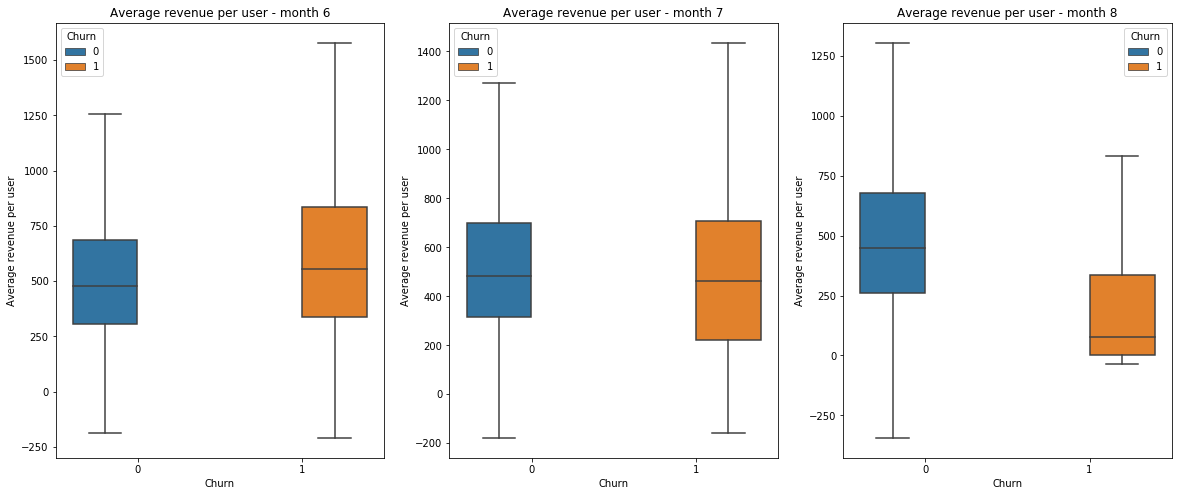

In [85]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
plt.title('Average revenue per user - month 6', fontsize=12)
ax = sns.boxplot(data=telecom_hvc, x='Churn', y='arpu_6',hue="Churn", showfliers=False)
plt.ylabel('Average revenue per user', fontsize=10)
#ax.legend(loc='lower center')

plt.subplot(1,3,2)
plt.title('Average revenue per user - month 7', fontsize=12)
ax = sns.boxplot(data=telecom_hvc, x='Churn', y='arpu_7',hue="Churn", showfliers=False)
plt.ylabel('Average revenue per user', fontsize=10)
#ax.legend(loc='lower center')

plt.subplot(1,3,3)
plt.title('Average revenue per user - month 8', fontsize=12)
sns.boxplot(data=telecom_hvc, x='Churn', y='arpu_8',hue="Churn", showfliers=False)
plt.ylabel('Average revenue per user', fontsize=10)
#ax.legend(loc='lower center')

plt.show()

<font color='blue'> <b>Observation - </b><br>We can see that the average revenue decreases significantly in the 8th month(action month) for churned customers.

### Analysis for "Total recharge amount for Voice calls"

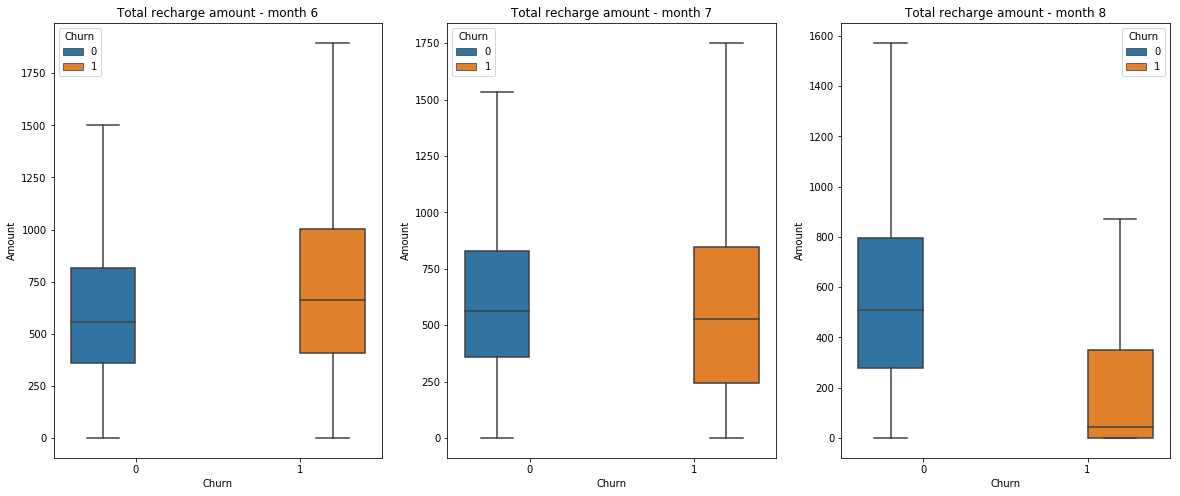

In [86]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
plt.title('Total recharge amount - month 6', fontsize=12)
ax = sns.boxplot(data=telecom_hvc, x='Churn', y='total_rech_amt_6',hue="Churn", showfliers=False)
plt.ylabel('Amount')

plt.subplot(1,3,2)
plt.title('Total recharge amount - month 7', fontsize=12)
ax = sns.boxplot(data=telecom_hvc, x='Churn', y='total_rech_amt_7',hue="Churn", showfliers=False)
plt.ylabel('Amount')

plt.subplot(1,3,3)
plt.title('Total recharge amount - month 8', fontsize=12)
ax = sns.boxplot(data=telecom_hvc, x='Churn', y='total_rech_amt_8',hue="Churn", showfliers=False)
plt.ylabel('Amount')

plt.show()

<font color='blue'> <b>Observation - </b><br>We can observe a significant drop in the "total recharge amount" for churned customers in the 8th month (action month)

### Analysis for "Total recharge amount for Internet data"

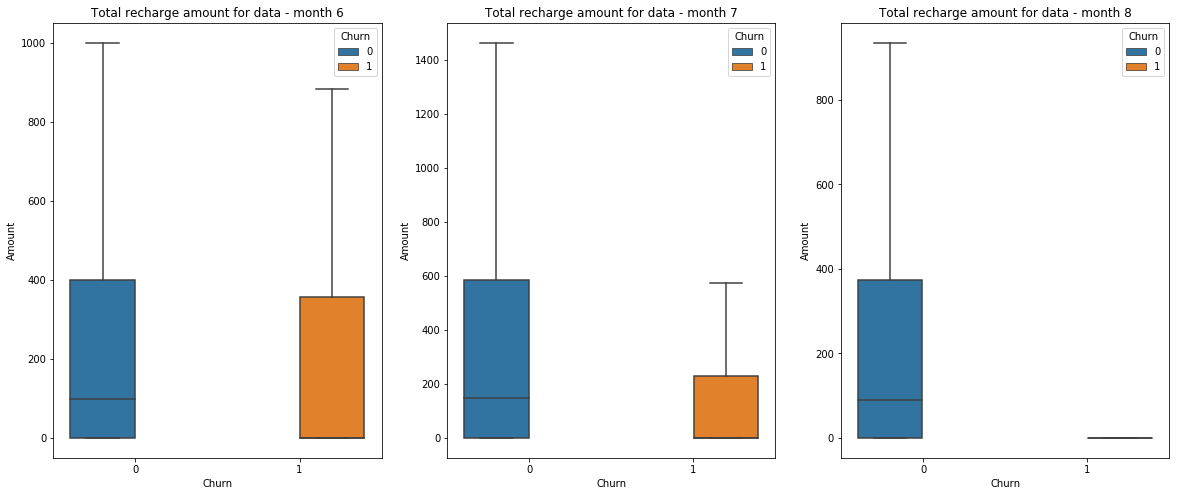

In [87]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
plt.title('Total recharge amount for data - month 6', fontsize=12)
ax = sns.boxplot(data=telecom_hvc, x='Churn', y='total_rech_amt_data_6',hue="Churn", showfliers=False)
plt.ylabel('Amount')

plt.subplot(1,3,2)
plt.title('Total recharge amount for data - month 7', fontsize=12)
ax = sns.boxplot(data=telecom_hvc, x='Churn', y='total_rech_amt_data_7',hue="Churn", showfliers=False)
plt.ylabel('Amount')

plt.subplot(1,3,3)
plt.title('Total recharge amount for data - month 8', fontsize=12)
ax = sns.boxplot(data=telecom_hvc, x='Churn', y='total_rech_amt_data_8',hue="Churn", showfliers=False)
plt.ylabel('Amount')

plt.show()

<font color='blue'> <b>Observation - </b><br>We can observe a significant drop in the "total recharge data amount" for churned customers in the 8th month (action month).

### Analysis for "Max recharge amount"

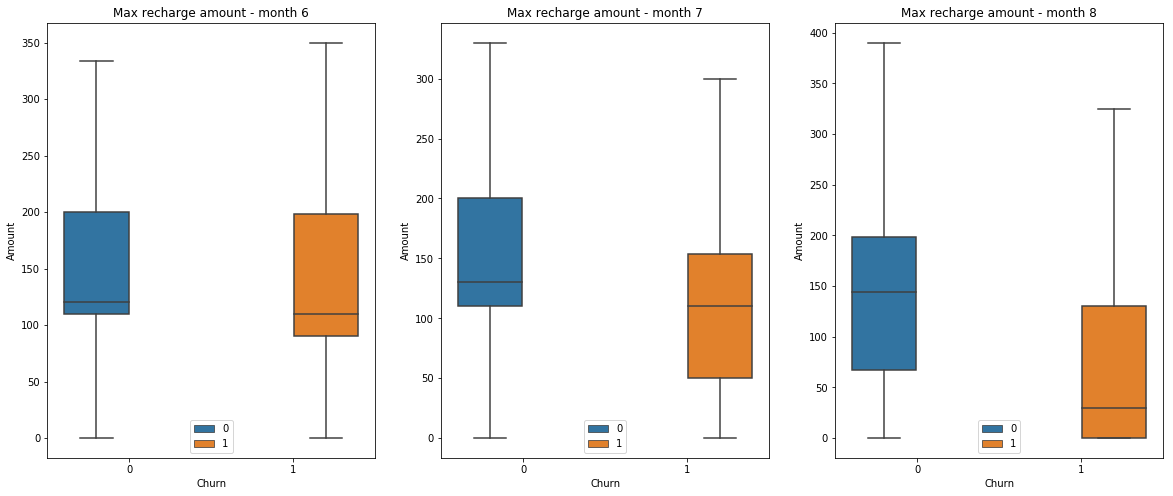

In [88]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
plt.title('Max recharge amount - month 6', fontsize=12)
ax = sns.boxplot(data=telecom_hvc, x='Churn', y='max_rech_amt_6',hue="Churn", showfliers=False)
plt.ylabel('Amount', fontsize=10)
ax.legend(loc='lower center')

plt.subplot(1,3,2)
plt.title('Max recharge amount - month 7', fontsize=12)
ax = sns.boxplot(data=telecom_hvc, x='Churn', y='max_rech_amt_7',hue="Churn", showfliers=False)
plt.ylabel('Amount', fontsize=10)
ax.legend(loc='lower center')

plt.subplot(1,3,3)
plt.title('Max recharge amount - month 8', fontsize=12)
ax = sns.boxplot(data=telecom_hvc, x='Churn', y='max_rech_amt_8',hue="Churn", showfliers=False)
plt.ylabel('Amount', fontsize=10)
ax.legend(loc='lower center')

plt.show()

<font color='blue'> <b>Observation - </b><br>We can see that the maximum recharge amount decreases significantly in the 8th month(action month) for churned customers.

### Analysis for "Last recharge day for Voice calls"

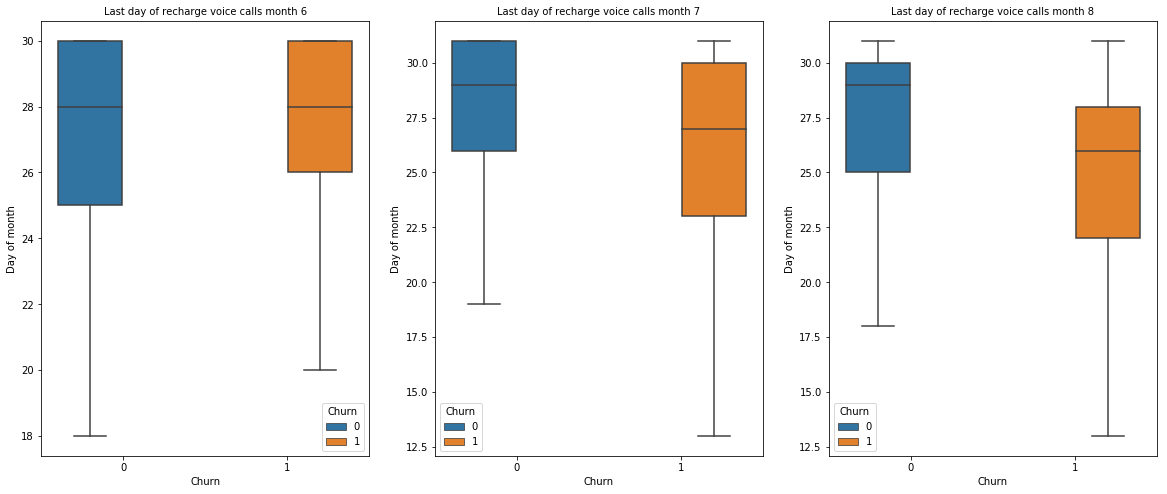

In [89]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
plt.title('Last day of recharge voice calls month 6', fontsize=10)
ax = sns.boxplot(data=telecom_hvc, x='Churn', y='last_recharge_day_6',hue="Churn", showfliers=False)
plt.ylabel('Day of month', fontsize=10)

plt.subplot(1,3,2)
plt.title('Last day of recharge voice calls month 7', fontsize=10)
ax =sns.boxplot(data=telecom_hvc, x='Churn', y='last_recharge_day_7',hue="Churn", showfliers=False)
plt.ylabel('Day of month', fontsize=10)

plt.subplot(1,3,3)
plt.title('Last day of recharge voice calls month 8', fontsize=10)
ax = sns.boxplot(data=telecom_hvc, x='Churn', y='last_recharge_day_8',hue="Churn", showfliers=False)
plt.ylabel('Day of month', fontsize=10)

plt.show()

<font color='blue'> <b>Observation - </b><br>We can see that the last recharge day is slightly lower in the 8th month(action month) for churned customers.

### Analysis for "Last recharge day for data"

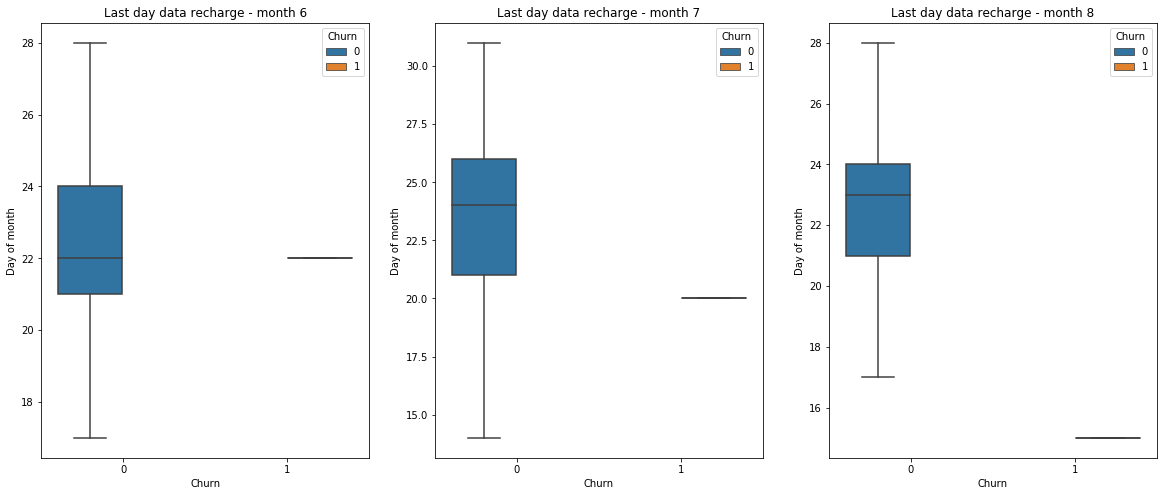

In [90]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
plt.title('Last day data recharge - month 6', fontsize=12)
ax = sns.boxplot(data=telecom_hvc, x='Churn', y='last_recharge_day_data_6',hue="Churn", showfliers=False)
plt.ylabel('Day of month', fontsize=10)

plt.subplot(1,3,2)
plt.title('Last day data recharge - month 7', fontsize=12)
ax = sns.boxplot(data=telecom_hvc, x='Churn', y='last_recharge_day_data_7',hue="Churn", showfliers=False)
plt.ylabel('Day of month', fontsize=10)

plt.subplot(1,3,3)
plt.title('Last day data recharge - month 8', fontsize=12)
ax = sns.boxplot(data=telecom_hvc, x='Churn', y='last_recharge_day_data_8',hue="Churn", showfliers=False)
plt.ylabel('Day of month', fontsize=10)

plt.show()

<font color='blue'> <b>Observation - </b><br>We can see that the last recharge day for internet data is lowest in the 8th month(action month) for churned customers.

### Analysis of Customers "Age on Network"

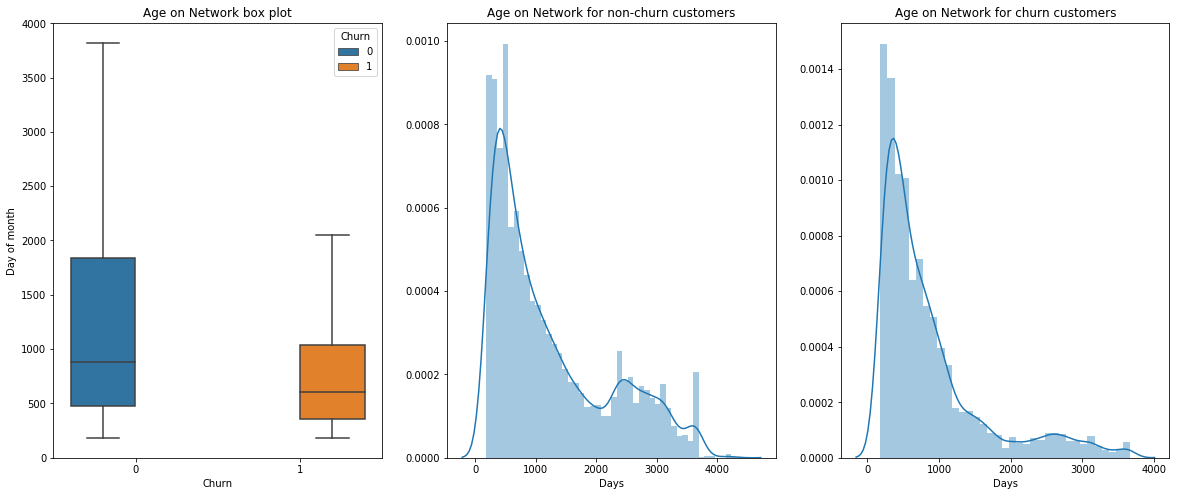

In [91]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
plt.title('Age on Network box plot', fontsize=12)
ax = sns.boxplot(data=telecom_hvc, x='Churn', y='aon',hue="Churn", showfliers=False)
plt.ylabel('Day of month', fontsize=10)

plt.subplot(1,3,2)
plt.title('Age on Network for non-churn customers', fontsize=12)
ax = sns.distplot(telecom_hvc.loc[telecom_hvc['Churn']==0,'aon'])
plt.xlabel('Days', fontsize=10)

plt.subplot(1,3,3)
plt.title('Age on Network for churn customers', fontsize=12)
ax = sns.distplot(telecom_hvc.loc[telecom_hvc['Churn']==1,'aon'])
plt.xlabel('Days', fontsize=10)

plt.show()

<font color='blue'> <b>Observation - </b><br>We can observe that lot of customers get churned in first 1000 days

### Analysis for "last day recharge amount"

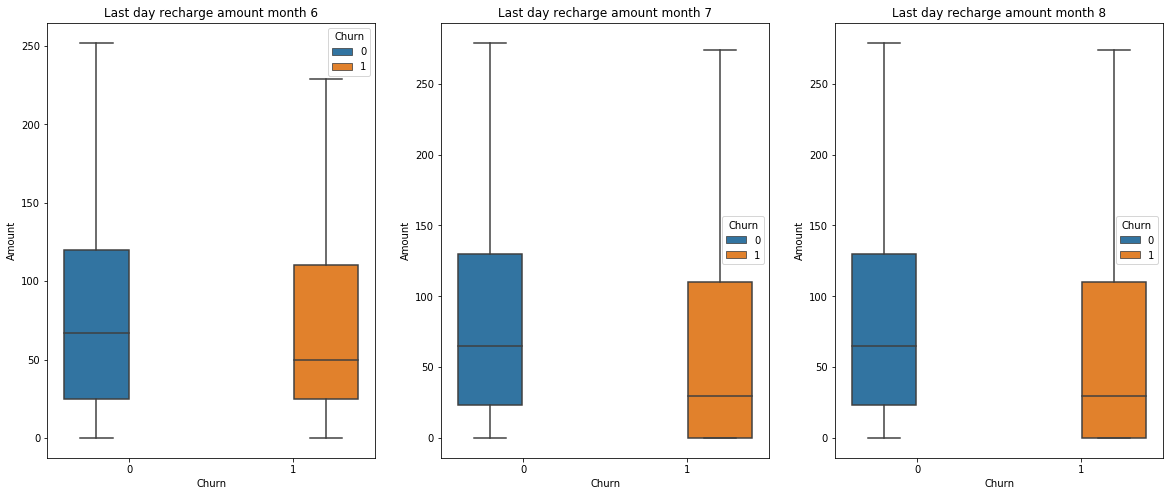

In [92]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
plt.title('Last day recharge amount month 6', fontsize=12)
ax = sns.boxplot(data=telecom_hvc, x='Churn', y='last_day_rch_amt_6',hue="Churn", showfliers=False)
plt.ylabel('Amount')

plt.subplot(1,3,2)
plt.title('Last day recharge amount month 7', fontsize=12)
ax = sns.boxplot(data=telecom_hvc, x='Churn', y='last_day_rch_amt_7',hue="Churn", showfliers=False)
plt.ylabel('Amount')

plt.subplot(1,3,3)
plt.title('Last day recharge amount month 8', fontsize=12)
ax = sns.boxplot(data=telecom_hvc, x='Churn', y='last_day_rch_amt_7',hue="Churn", showfliers=False)
plt.ylabel('Amount')

plt.show()

<font color='blue'> <b>Observation - </b><br>We can see that the median value decreases for "last day recharge amount" in the 8th month(action month) for churned customers.

## Step 3 - Creating models

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_auc_score,f1_score,accuracy_score, roc_curve

### Let's create a common function to display all the necessary evaluation metric scores for our models

In [94]:
# Function to print all the necessary metric scores for our model
def Model_metrics(y_test,y_pred):
    cm = confusion_matrix(y_test,y_pred)
    sensitivity = cm[1,1]/(cm[1,0] + cm[1,1])
    specificity = cm[0,0]/(cm[0,0] + cm[0,1])
    precision   = cm[1,1]/(cm[0,1] + cm[1,1])
    print('Model Evaluation measures: \n')
    print('Confusion Matrix :\n',cm)
    print("Accuracy    : ", round(accuracy_score(y_test,y_pred)*100,2))
    print("Sensitivity : ", round(sensitivity*100,2))
    print("Specificity : ", round(specificity*100,2))
    print("AUC Score   : ", round(roc_auc_score(y_test,y_pred)*100,2)) 
    print("Precision   : ", round(precision*100,2))
    print("f1 Score    : ", round(f1_score(y_test,y_pred)*100,2))

### Also let's create a function to plot the ROC curve.

In [95]:
def draw_roc(actual,probs):
    fpr, tpr, thresholds = roc_curve(actual, probs,
                                             drop_intermediate = False )
    auc_score = roc_auc_score(actual,probs)
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

### Let's first create a base model using Logistic Regression and evaluate it.

In [96]:
X = telecom_hvc.drop(['Churn'], axis=1)

y = telecom_hvc['Churn']

X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,avg_recharge,last_recharge_day_6,last_recharge_day_7,last_recharge_day_8,last_recharge_day_data_6,last_recharge_day_data_7,last_recharge_day_data_8
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,252.0,252.0,252.0,279.5,21.0,16.0,8.0,21.0,16.0,8.0
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,0.0,0.0,0.0,592.5,27.0,25.0,26.0,22.0,20.0,15.0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,0.0,354.0,207.0,348.0,25.0,31.0,30.0,22.0,31.0,23.0
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,...,0.0,0.0,0.0,320.0,30.0,31.0,31.0,22.0,24.0,23.0
23,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,...,0.0,712.0,540.0,291.5,18.0,7.0,24.0,22.0,7.0,6.0


In [97]:
y.head()

0     1
7     1
8     0
21    0
23    0
Name: Churn, dtype: int32

In [98]:
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [99]:
#Let's check if the Churn rate is maintained in train data-set
print("Churn rate in train data-set = ",round(y_train.sum() / len(y_train) * 100,2))

Churn rate in train data-set =  8.05


In [100]:
#Let's check if the Churn rate is maintained in test data-set
print("Churn rate in test data-set = ",round(y_test.sum() / len(y_test) * 100,2))

Churn rate in test data-set =  8.33


In [101]:
scaler = StandardScaler()

cols = X_train.columns

X_train_scaled = scaler.fit_transform(X_train)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=cols)

In [102]:
X_train_scaled.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,avg_recharge,last_recharge_day_6,last_recharge_day_7,last_recharge_day_8,last_recharge_day_data_6,last_recharge_day_data_7,last_recharge_day_data_8
0,1.115484,0.688737,0.152667,-0.557530,-0.541565,-0.498528,-0.461376,-0.438796,-0.489079,0.166015,...,-0.364843,-0.356511,-0.275102,0.024772,-0.734391,-1.151014,0.439604,0.167874,0.281700,0.296442
1,-0.096775,-0.500253,-0.275833,-0.252141,-0.454845,-0.420576,-0.109409,-0.302716,-0.143763,-0.211944,...,-0.044860,-0.060525,-0.217277,-0.189625,-0.521430,0.159379,0.819721,0.484588,0.890594,-0.607651
2,-0.551742,-0.495133,-0.370946,-0.417911,-0.397984,-0.328062,-0.084162,-0.162412,-0.251206,0.019451,...,-0.346069,-0.111190,-0.275102,-0.447051,0.756336,0.377778,-0.700744,0.642945,0.433924,0.296442
3,1.430336,-0.476286,0.364233,4.658430,-0.212796,1.006632,0.200074,-0.355665,0.453869,-0.211944,...,-0.364843,-0.356511,-0.275102,-0.263229,0.330414,0.814576,0.439604,0.167874,0.281700,0.296442
4,-0.256450,-0.210469,-0.463214,-0.531335,-0.462941,-0.457129,-0.388716,-0.155114,-0.522919,-0.211944,...,-0.239135,-0.253849,-0.184234,-0.364765,0.543375,0.159379,0.819721,-0.148841,-0.631640,-0.909015


In [103]:
cols = X_test.columns

X_test_scaled = scaler.transform(X_test)

X_test_scaled = pd.DataFrame(X_test_scaled, columns=cols)

X_test_scaled.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,avg_recharge,last_recharge_day_6,last_recharge_day_7,last_recharge_day_8,last_recharge_day_data_6,last_recharge_day_data_7,last_recharge_day_data_8
0,-0.042018,-0.051478,-0.431655,-0.535108,-0.547345,-0.491683,-0.664447,-0.724659,-0.645281,-0.211944,...,-0.364843,-0.356511,-0.275102,-0.320980,0.330414,0.377778,-2.981442,0.167874,-0.327193,-0.909015
1,-1.014833,-0.705605,-0.810840,-0.535174,-0.539374,-0.488488,-0.721905,-0.711808,-0.684073,-0.136770,...,-0.309336,0.537445,-0.142340,-0.216801,0.543375,0.377778,-0.130570,1.276373,1.042818,-1.511744
2,0.333892,0.314390,0.214299,0.193042,-0.084426,-0.002995,0.926302,0.850769,1.104758,-0.211944,...,-0.217912,-0.052526,-0.275102,0.030056,0.543375,-0.714216,0.249546,-2.682553,-0.783864,0.296442
3,-0.212810,-0.152119,-0.097923,-0.395753,-0.423191,-0.257737,-0.051721,-0.214171,-0.232016,-0.211944,...,-0.364843,-0.356511,-0.275102,-0.463282,0.756336,0.814576,0.819721,0.167874,0.281700,0.296442
4,0.096621,-0.319242,-0.780432,0.867727,0.240984,-0.406015,-0.460149,-0.506518,-0.680565,-0.211944,...,0.134723,-0.253849,-0.275102,-0.134516,0.756336,0.159379,-0.320628,0.009517,-0.479417,-0.909015


In [104]:
lr_base = LogisticRegression()

In [105]:
lr_base.fit(X_train_scaled,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [106]:
y_pred_train_base = lr_base.predict(X_train_scaled)

In [107]:
y_pred_test_base = lr_base.predict(X_test_scaled)

In [108]:
#Model evaluation statistics for training data-set
print("Evaluating our Base Logistic Regression model for training data-set")
print("--------------------------------------------------------------------")
Model_metrics(y_train,y_pred_train_base)

Evaluating our Base Logistic Regression model for training data-set
--------------------------------------------------------------------
Model Evaluation measures: 

Confusion Matrix :
 [[19103   206]
 [  608  1083]]
Accuracy    :  96.12
Sensitivity :  64.04
Specificity :  98.93
AUC Score   :  81.49
Precision   :  84.02
f1 Score    :  72.68


In [109]:
#Model evaluation statistics for test data-set
print("Evaluating our Base Logistic Regression model for test data-set")
print("----------------------------------------------------------------")
Model_metrics(y_test,y_pred_test_base)

Evaluating our Base Logistic Regression model for test data-set
----------------------------------------------------------------
Model Evaluation measures: 

Confusion Matrix :
 [[8156   95]
 [ 275  475]]
Accuracy    :  95.89
Sensitivity :  63.33
Specificity :  98.85
AUC Score   :  81.09
Precision   :  83.33
f1 Score    :  71.97


<font color='blue'> <b>Observation - </b><br>We can see that we have an Accuracy score of ~95%, but remember earlier we said that we have <b>"Class imbalance"</b> problem, which means that we cannot rely on the accuracy score.<br><br>
Also the "Sensitivity" score is low which is our metric of interest.

## Let's handle Class-Imbalance first before we create any new model.

Some reference links to handle Class imbalance -<br>
https://elitedatascience.com/imbalanced-classes

https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

https://www.kaggle.com/npramod/techniques-to-deal-with-imbalanced-data

In [110]:
print(round(telecom_hvc['Churn'].value_counts() / len(telecom_hvc['Churn']) * 100 , 2))

print("\nChurn rate is - ",round(telecom_hvc['Churn'].sum() / len(telecom_hvc.index) * 100, 2))

0    91.86
1     8.14
Name: Churn, dtype: float64

Churn rate is -  8.14


#### We will use Up-Sampling technique for minority class to handle "Class-Imbalance" problem.

In [111]:
from sklearn.utils import resample

In [112]:
# Separate majority and minority classes
df_majority = telecom_hvc[telecom_hvc.Churn==0]
df_minority = telecom_hvc[telecom_hvc.Churn==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=27560,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
telecom_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
print(telecom_upsampled.Churn.value_counts())

X = telecom_upsampled.drop(['Churn'], axis=1)

y = telecom_upsampled['Churn']

X.head()

1    27560
0    27560
Name: Churn, dtype: int64


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,avg_recharge,last_recharge_day_6,last_recharge_day_7,last_recharge_day_8,last_recharge_day_data_6,last_recharge_day_data_7,last_recharge_day_data_8
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.0,...,0.0,354.0,207.0,348.00,25.0,31.0,30.0,22.0,31.0,23.0
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.0,...,0.0,0.0,0.0,320.00,30.0,31.0,31.0,22.0,24.0,23.0
23,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.0,...,0.0,712.0,540.0,291.50,18.0,7.0,24.0,22.0,7.0,6.0
33,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,5285.0,20424.0,455.0,7393.25,30.0,30.0,26.0,30.0,28.0,26.0
38,363.987,486.558,393.909,248.99,619.96,666.38,88.86,50.58,97.81,0.0,...,0.0,0.0,0.0,264.00,30.0,28.0,24.0,22.0,24.0,23.0


In [113]:
print("After Up-Sampling Churn rate is -",round(telecom_upsampled['Churn'].sum() / len(telecom_upsampled.index) * 100, 2))

After Up-Sampling Churn rate is - 50.0


<font color='blue'> <b>Observation - </b><br>As we can see from above we have Up-Sampled the minority  class (Churn).
<br>So now we have equal number of observations for both the classes.

####  We can also use other technique of "Down-Sampling" the majority class to handle "Class-Imbalance" problem. 

####  Just un-comment below code and comment the above code to try and use this technique.

####  Up-Sampling is giving slightly better results that down-sampling, so using that one here.

In [114]:
# Separate majority and minority classes
#df_majority = telecom_hvc[telecom_hvc.Churn==0]
#df_minority = telecom_hvc[telecom_hvc.Churn==1]
 
# Downsample majority class
#df_majority_downsampled = resample(df_majority, 
#                                 replace=False,     # sample with replacement
#                                 n_samples=2441,    # to match majority class
#                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
#telecom_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
#telecom_downsampled.Churn.value_counts()

#X = telecom_downsampled.drop(['Churn'], axis=1)

#y = telecom_downsampled['Churn']

#X.head()

In [115]:
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [116]:
#Let's check if the Churn rate is maintained in training data-set
round(y_train.sum() / len(y_train) * 100,2)

49.96

In [117]:
#Let's check if the Churn rate is maintained in training data-set
round(y_test.sum() / len(y_test) * 100,2)

50.08

<font color='blue'> <b>Observation - </b><br>So we have ~50% of Churn and Non-Churn customers and have a balanced data-set.
<br>So we have handled the "Class-Imbalance" issue.

### Fitting "Logistic Regression" model on data-set after handling "Class-Imbalance"

In [118]:
scaler = StandardScaler()

cols = X_train.columns

X_train_scaled = scaler.fit_transform(X_train)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=cols)

In [119]:
cols = X_test.columns

X_test_scaled = scaler.transform(X_test)

X_test_scaled = pd.DataFrame(X_test_scaled, columns=cols)

X_test_scaled.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,avg_recharge,last_recharge_day_6,last_recharge_day_7,last_recharge_day_8,last_recharge_day_data_6,last_recharge_day_data_7,last_recharge_day_data_8
0,-0.526977,-0.193179,-0.228776,-0.519541,-0.428984,-0.380616,-0.537850,-0.535309,-0.337342,-0.206184,...,-0.209522,-0.178675,-0.068706,-0.479030,-0.533491,-1.894490,-2.576086,0.489804,-1.274654,-1.324038
1,1.220232,0.944474,-0.191727,1.090596,1.044311,-0.080339,1.142750,0.885412,0.246738,-0.206184,...,-0.326371,-0.323633,-0.225064,0.205967,0.316008,0.659047,-3.416338,0.157988,-0.155310,-0.525234
2,-0.278685,-0.891382,-0.810784,-0.365573,-0.422491,-0.435038,-0.475179,-0.641674,-0.570193,-0.052473,...,-0.039560,-0.311187,-0.225064,-0.489313,0.316008,-2.076886,-0.055332,1.153437,-2.393998,-0.525234
3,1.184086,-0.155872,-0.022302,1.439662,-0.223192,-0.163799,2.234350,0.336092,0.152054,-0.206184,...,-0.307402,-0.305330,-0.225064,-0.104892,0.528383,0.294256,-0.055332,0.489804,0.164502,-0.525234
4,0.370389,0.330965,-0.615336,-0.293198,-0.396307,-0.430682,1.669520,0.874479,-0.551242,-0.206184,...,-0.326371,-0.323633,-0.225064,-0.176081,0.740757,-0.252931,0.616870,0.157988,-0.155310,-0.525234


In [120]:
lr_2 = LogisticRegression()

In [121]:
lr_2.fit(X_train_scaled,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [122]:
y_pred_train_lr_2 = lr_2.predict(X_train_scaled)

In [123]:
y_pred_test_lr_2 = lr_2.predict(X_test_scaled)

In [124]:
#Model evaluation statistics for training data-set
Model_metrics(y_train,y_pred_train_lr_2)

Model Evaluation measures: 

Confusion Matrix :
 [[16839  2467]
 [ 1978 17300]]
Accuracy    :  88.48
Sensitivity :  89.74
Specificity :  87.22
AUC Score   :  88.48
Precision   :  87.52
f1 Score    :  88.62


In [125]:
#Model evaluation statistics for test data-set
Model_metrics(y_test,y_pred_test_lr_2)

Model Evaluation measures: 

Confusion Matrix :
 [[7246 1008]
 [ 833 7449]]
Accuracy    :  88.87
Sensitivity :  89.94
Specificity :  87.79
AUC Score   :  88.86
Precision   :  88.08
f1 Score    :  89.0


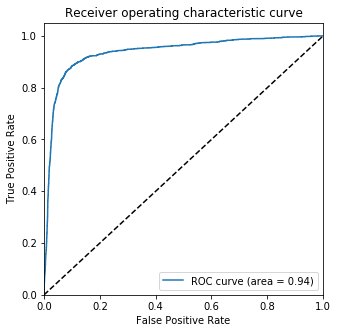

In [126]:
y_pred_proba_lr_2 = lr_2.predict_proba(X_test_scaled)

draw_roc(y_test, y_pred_proba_lr_2[:,1])

<font color='blue'> <b>Observation - </b><br>We can observe that after handling "Class-Imbalance" our model evaluation scores have improved for <b>"Sensitivity"</b> our metric of interest.

## Let's now use PCA technique for dimensionality reduction

PCA (Principal Component Analysis) is a technique which is used to reduce the dimensionality of the data-set by finding the principal components which try to capture the variance in the data as Information.
<br>Each principal component is orthogonal to every other principal component.

In [127]:
from sklearn.decomposition import PCA

In [128]:
pca = PCA(svd_solver='randomized', random_state=50)

In [129]:
pca.fit(X_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=50,
  svd_solver='randomized', tol=0.0, whiten=False)

In [130]:
colnames = list(X_train_scaled.columns)
pcs_df = pd.DataFrame({'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1]})
pcs_df.head()

,Feature,PC1,PC2
0,arpu_6,0.169192,-0.094247
1,arpu_7,0.236198,-0.090667
2,arpu_8,0.269022,-0.054735
3,onnet_mou_6,0.035357,-0.155451
4,onnet_mou_7,0.072085,-0.162123


In [131]:
print("Dot product between 1st and 2nd Princiapl components =",round(np.dot(pca.components_[0],pca.components_[1]),2))

Dot product between 1st and 2nd Princiapl components = 0.0


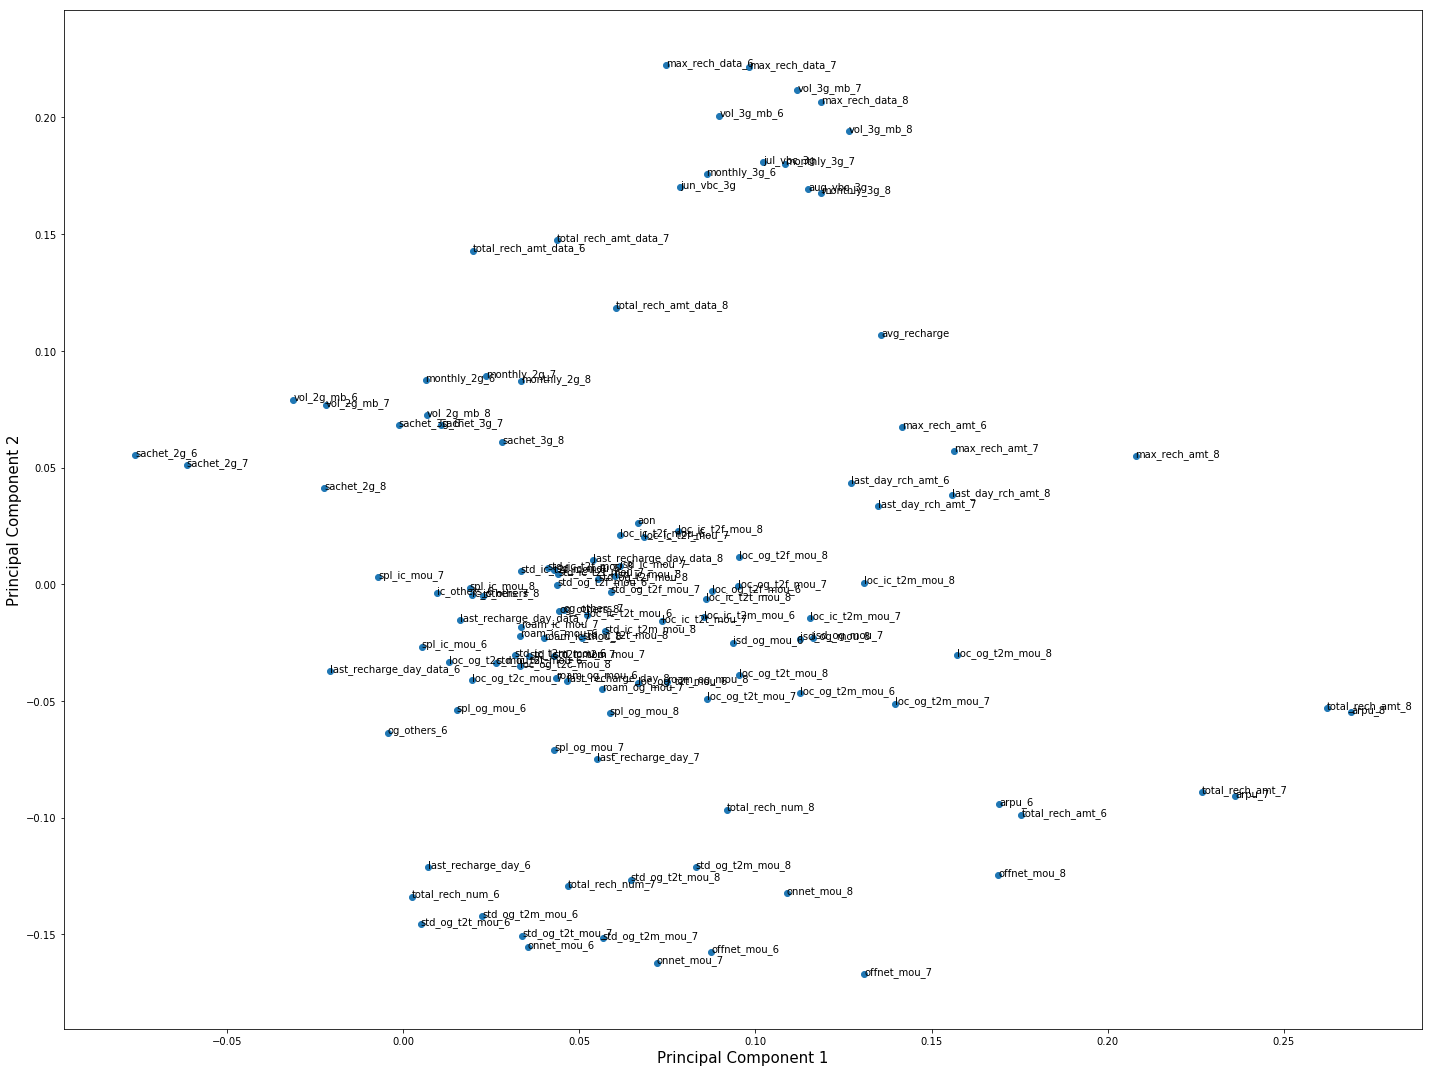

In [132]:
%matplotlib inline
fig = plt.figure(figsize = (20,15))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1',fontsize=15)
plt.ylabel('Principal Component 2',fontsize=15)
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

<font color='blue'> <b>Observation - </b><br>We can see that - <br>
1] First principal components captures the "Total recharge amount", "Average revenue per user" and "Max recharge amount"<br>
2] Second principal component captures the "Max recharge data", "3g volume in MB"

### Let's use Scree plot to identify the ideal number of components

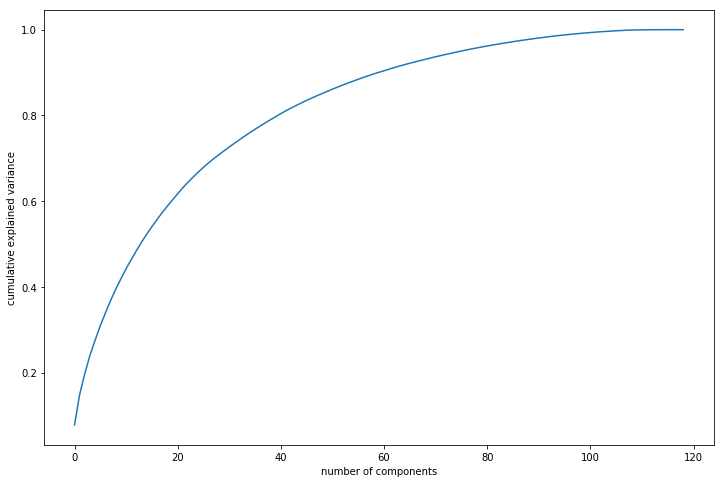

In [133]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

<font color='blue'> <b>Observation - </b><br>We observe from above "Scree plot" that about 90% of variance is explained by ~70 principal components.

In [134]:
# Using incremental PCA for efficiency
from sklearn.decomposition import IncrementalPCA

pca_final = IncrementalPCA(n_components=70)

#### Basis transformation - getting the data onto our PCs

In [135]:
X_train_pca = pca_final.fit_transform(X_train_scaled)

X_train_pca.shape

(38584, 70)

In [136]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())

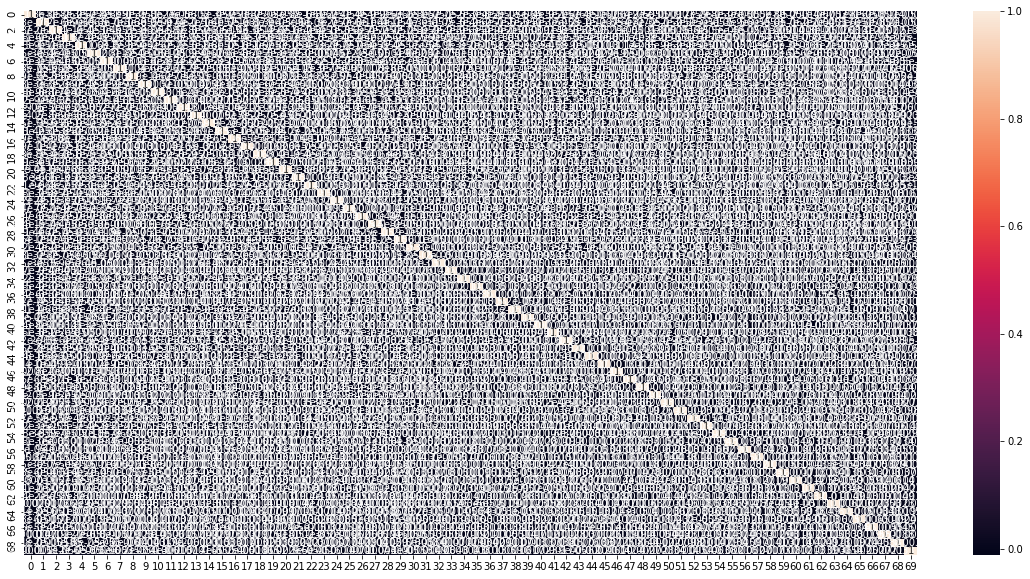

In [137]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [138]:
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("min corr: ", corrmat_nodiag.min(),", max corr:",corrmat_nodiag.max())

min corr:  -0.0111219582293409 , max corr: 0.011902757183475356


<font color='blue'> <b>Observation - </b><br>Though the actual values are not visible, the black color in all the matrix elements except the diagonal one means that the values are very close to zero which implies that all the principal components are perpendicular (independent) to each other.

#### Let's also transform out test data-set.

In [139]:
# Let's also transform our test data-set

X_test_pca = pca_final.transform(X_test_scaled)

X_test_pca.shape

(16536, 70)

## Let's now build a Logistic Regression model on our PCA transformed data-set.

In [140]:
lr_pca = LogisticRegression()

In [141]:
model_pca = lr_pca.fit(X_train_pca,y_train)

In [142]:
y_pred_test_pca = model_pca.predict(X_test_pca)

In [143]:
#Model evaluation statistics for test data-set
Model_metrics(y_test,y_pred_test_pca)

Model Evaluation measures: 

Confusion Matrix :
 [[7217 1037]
 [ 915 7367]]
Accuracy    :  88.2
Sensitivity :  88.95
Specificity :  87.44
AUC Score   :  88.19
Precision   :  87.66
f1 Score    :  88.3


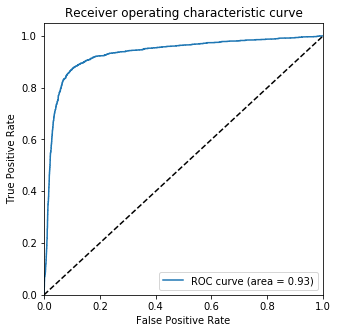

In [144]:
y_pred_test_pca_proba = model_pca.predict_proba(X_test_pca)

draw_roc(y_test, y_pred_test_pca_proba[:,1])

<font color='blue'> <b>Observation - </b><br>So we have achieved same score for accuracy and other metrics using just 70 principal components.

### Let's now try and find the optimal cut-off probability

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [145]:
y_train_pred_pca_proba = model_pca.predict_proba(X_train_pca)
y_train_pred_pca_proba

array([[0.68409421, 0.31590579],
       [0.12656072, 0.87343928],
       [0.8623372 , 0.1376628 ],
       ...,
       [0.96181025, 0.03818975],
       [0.72989028, 0.27010972],
       [0.23005965, 0.76994035]])

In [146]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred_pca_proba[:,1]})
y_train_pred_final['mobile_number'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,mobile_number
0,1,0.315906,75196
1,1,0.873439,93552
2,0,0.137663,21007
3,0,0.418220,53954
4,0,0.045978,74129


#### Let's find the value for target variable "Churn" for different probability values

In [147]:
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,mobile_number,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.315906,75196,1,1,1,1,0,0,0,0,0,0
1,1,0.873439,93552,1,1,1,1,1,1,1,1,1,0
2,0,0.137663,21007,1,1,0,0,0,0,0,0,0,0
3,0,0.418220,53954,1,1,1,1,1,0,0,0,0,0
4,0,0.045978,74129,1,0,0,0,0,0,0,0,0,0


#### Let's compute the "Accuracy", "Sensitivity" and "Specificity" for different probability cut-offs

In [148]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.499637  1.000000  0.000000
0.1   0.1  0.729473  0.964104  0.495183
0.2   0.2  0.800669  0.945845  0.655703
0.3   0.3  0.845143  0.931995  0.758417
0.4   0.4  0.867510  0.913580  0.821506
0.5   0.5  0.877747  0.889096  0.866415
0.6   0.6  0.882050  0.860463  0.903605
0.7   0.7  0.874896  0.815022  0.934684
0.8   0.8  0.833402  0.708580  0.958044
0.9   0.9  0.707547  0.434744  0.979954


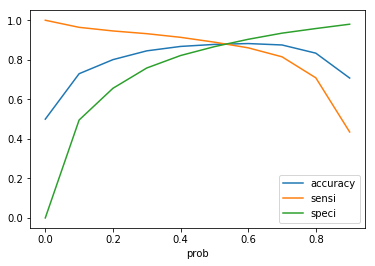

In [149]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

<font color='blue'> <b>Observation - </b><br>From above plot we can see that the three scores intersect at approx. "0.5" probability cut-off, which is the default one for our model.

## Let's now build a "Support Vector Classifier" model on our PCA transformed data-set.

In [150]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [151]:
# Let's create an SVC model.
model = SVC(C = 1)

model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)

In [152]:
#Model evaluation statistics for test data-set
Model_metrics(y_test,y_pred)

Model Evaluation measures: 

Confusion Matrix :
 [[8004  250]
 [ 239 8043]]
Accuracy    :  97.04
Sensitivity :  97.11
Specificity :  96.97
AUC Score   :  97.04
Precision   :  96.99
f1 Score    :  97.05


<font color='blue'> <b>Observation - </b><br>Our "Support Vector Classifier" model is doing a very good job of classification.

### Let's tune the Hyper-parameter "C"
#### Commenting below code as it is taking a long time to execute.

In [153]:
# creating a KFold object with 5 splits 
#folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# instantiating a model with cost=1
#model = SVC(C = 1)

In [154]:
# specify range of parameters (C) as a list
#params = {"C": [0.1, 1, 10, 100, 1000]}

#model = SVC()

# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
#model_cv = GridSearchCV(estimator = model, param_grid = params, 
#                        scoring= 'accuracy', 
#                        cv = folds, 
#                        verbose = 1,
#                       return_train_score=True)      

In [155]:
# fit the model - it will fit 5 folds across all values of C
#model_cv.fit(X_train_pca, y_train)  

In [156]:
# results of grid search CV
#cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results

In [157]:
# plot of C versus train and test scores

#plt.figure(figsize=(8, 6))
#plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
#plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
#plt.xlabel('C')
#plt.ylabel('Accuracy')
#plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
#plt.xscale('log')

## Let's now build a "Decision Tree Classifier" model on our PCA transformed data-set.

In [158]:
from sklearn.tree import DecisionTreeClassifier

#We will first use the default parameters to build our model
model_dt = DecisionTreeClassifier()

model_dt.fit(X_train_pca, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [159]:
y_pred_test_dt = model_dt.predict(X_test_pca)

In [160]:
#Model evaluation statistics for test data-set
Model_metrics(y_test,y_pred_test_dt)

Model Evaluation measures: 

Confusion Matrix :
 [[7768  486]
 [   0 8282]]
Accuracy    :  97.06
Sensitivity :  100.0
Specificity :  94.11
AUC Score   :  97.06
Precision   :  94.46
f1 Score    :  97.15


#### Let's now find the otpimal Hyper-parameter for the "Decision Tree Classifier" using Grid Search

In [161]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(random_state = 200)

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           cv = n_folds, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.6min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=200,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(5, 15, 5), 'min_samples_leaf': range(50, 150, 50), 'min_samples_split': range(50, 150, 50), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [162]:
# Let's check the Cross-Validataion results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.145352,0.013439,0.002592,0.000461,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.815755,...,0.815157,0.001856,15,0.820482,0.819808,0.819937,0.820202,0.819846,0.820055,0.000254
1,1.097305,0.013819,0.000000,0.000000,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.815755,...,0.815157,0.001856,15,0.820482,0.819808,0.819937,0.820202,0.819846,0.820055,0.000254
2,1.077886,0.000015,0.000000,0.000000,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.815755,...,0.815830,0.001232,13,0.820482,0.819808,0.819937,0.821304,0.821206,0.820547,0.000621
3,1.084121,0.007669,0.000000,0.000000,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.815755,...,0.815830,0.001232,13,0.820482,0.819808,0.819937,0.821304,0.821206,0.820547,0.000621
4,1.621492,0.018218,0.006249,0.007653,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.864861,...,0.866991,0.002286,3,0.886056,0.888198,0.886805,0.889854,0.889854,0.888153,0.001549
5,1.627755,0.020723,0.003118,0.006235,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.864861,...,0.866991,0.002286,3,0.886056,0.888198,0.886805,0.889854,0.889854,0.888153,0.001549
6,1.530915,0.022103,0.003117,0.006235,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.849313,...,0.850301,0.002508,7,0.858939,0.861276,0.864386,0.862479,0.863969,0.862210,0.001974
7,1.540267,0.023382,0.000000,0.000000,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.849313,...,0.850301,0.002508,7,0.858939,0.861276,0.864386,0.862479,0.863969,0.862210,0.001974
8,0.765445,0.000006,0.000000,0.000000,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.818347,...,0.819407,0.000843,9,0.823495,0.823728,0.823663,0.825936,0.823863,0.824137,0.000907
9,0.778106,0.007015,0.009368,0.007649,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.818347,...,0.819407,0.000843,9,0.823495,0.823728,0.823663,0.825936,0.823863,0.824137,0.000907


#### Let's find out our optimal Hyper-parameters

In [163]:
print("best accuracy", grid_search.best_score_)

print(grid_search.best_estimator_)

best accuracy 0.8684169603980925
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=200,
            splitter='best')


#### Let's create a final "Decision Tree Classifier" using our optimal Hyper-parameters.

In [164]:
model_dt_final = DecisionTreeClassifier(criterion = "gini", 
                                        random_state = 100,
                                        max_depth=10, 
                                        min_samples_leaf=50,
                                        min_samples_split=50)

model_dt_final.fit(X_train_pca, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [165]:
y_pred_test_dt_final = model_dt_final.predict(X_test_pca)

In [166]:
#Model evaluation statistics for test data-set
Model_metrics(y_test,y_pred_test_dt_final)

Model Evaluation measures: 

Confusion Matrix :
 [[7117 1137]
 [ 836 7446]]
Accuracy    :  88.07
Sensitivity :  89.91
Specificity :  86.22
AUC Score   :  88.07
Precision   :  86.75
f1 Score    :  88.3


<font color='blue'> <b>Observation - </b><br>We have achieved decent metrics scores.

## Let's now use an ensemble technique "Random Forest Classifier" on our PCA transformed data-set.

In [167]:
from sklearn.ensemble import RandomForestClassifier

# Let's create a base model with the default hyper-parameters
rfc_base = RandomForestClassifier()

D:\Installed_Softwares\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [168]:
rfc_base.fit(X_train_pca, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [169]:
y_pred_test_rf = rfc_base.predict(X_test_pca)

In [170]:
#Model evaluation statistics for test data-set
Model_metrics(y_test,y_pred_test_rf)

Model Evaluation measures: 

Confusion Matrix :
 [[8165   89]
 [   0 8282]]
Accuracy    :  99.46
Sensitivity :  100.0
Specificity :  98.92
AUC Score   :  99.46
Precision   :  98.94
f1 Score    :  99.47


<font color='blue'> <b>Observation - </b><br>Our "Random Forest Classifier" is doing a very good job even with the default parameters.

### Let's do Grid Search to find the optimal Hyper-parameters

In [171]:
# Let's create our parameter grid
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}

# Instantiate a base model
rf = RandomForestClassifier(random_state = 102)

# Let's perform the Grid search
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3, 
                           n_jobs = -1,
                           verbose = 1)

In [172]:
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  8.5min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=102, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [4, 8, 10], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 200), 'n_estimators': [100, 200, 300], 'max_features': [5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

### Let's see what our optimal hyper-parameters are.

In [173]:
print('We can get accuracy of -',round(grid_search.best_score_*100,2),'\nusing -',grid_search.best_params_)

We can get accuracy of - 88.49 
using - {'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [174]:
# Let's build a model using above optimal hyper-parameters

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=5,
                             n_estimators=300,
                             random_state = 105)

In [175]:
rfc.fit(X_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=105, verbose=0, warm_start=False)

In [176]:
y_pred_test_rfc = rfc.predict(X_test_pca)

In [177]:
#Model evaluation statistics for test data-set
Model_metrics(y_test,y_pred_test_rfc)

Model Evaluation measures: 

Confusion Matrix :
 [[7471  783]
 [ 855 7427]]
Accuracy    :  90.09
Sensitivity :  89.68
Specificity :  90.51
AUC Score   :  90.1
Precision   :  90.46
f1 Score    :  90.07


## Let's now try AdaBoost algorithm.

In [178]:
from sklearn.ensemble import AdaBoostClassifier

In [179]:
# Let's create a weak learner tree (max_depth=2) as our base estimator and evaluate it.

shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 100)

shallow_tree.fit(X_train_pca, y_train)

y_pred_weak_dt = shallow_tree.predict(X_test_pca)

In [180]:
#Model evaluation statistics for test data-set
Model_metrics(y_test,y_pred_weak_dt)

Model Evaluation measures: 

Confusion Matrix :
 [[6541 1713]
 [2914 5368]]
Accuracy    :  72.02
Sensitivity :  64.82
Specificity :  79.25
AUC Score   :  72.03
Precision   :  75.81
f1 Score    :  69.88


<font color='blue'> <b>Observation - </b><br>Sensitiviy score is pretty low for our weak learner decision tree.

### Let's now use AdaBoost to boost the performance of our weak learner.

Model values for estimators =  200
Model Evaluation measures: 

Confusion Matrix :
 [[7762  492]
 [ 251 8031]]
Accuracy    :  95.51
Sensitivity :  96.97
Specificity :  94.04
AUC Score   :  95.5
Precision   :  94.23
f1 Score    :  95.58


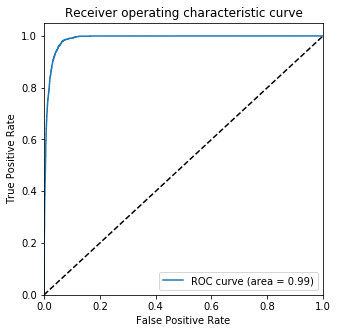



Model values for estimators =  300
Model Evaluation measures: 

Confusion Matrix :
 [[7856  398]
 [  92 8190]]
Accuracy    :  97.04
Sensitivity :  98.89
Specificity :  95.18
AUC Score   :  97.03
Precision   :  95.37
f1 Score    :  97.1


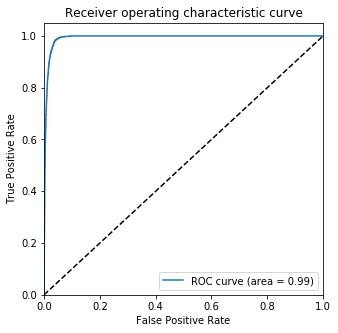

In [181]:
estimators = [200, 300]

for n_est in estimators:
    ABC = AdaBoostClassifier(base_estimator = shallow_tree, 
                             n_estimators = n_est)
    ABC.fit(X_train_pca, y_train)
    y_pred_ada = ABC.predict(X_test_pca)
    print("Model values for estimators = ",n_est)
    Model_metrics(y_test,y_pred_ada)
    y_pred_ada_proba = ABC.predict_proba(X_test_pca)
    draw_roc(y_test, y_pred_ada_proba[:,1])
    print("\n")
    

<font color='blue'> <b>Observation - </b><br>We can see that <b>"SVM"</b> and <b>"Random Forest Classifier"</b> models gives us a very good "Classiciation models" as the test evaluation metrics are very good.<br>
    
<b>SVM metrics - </b><br>
Accuracy    :  97.04<br>
Sensitivity :  97.11<br>
Specificity :  96.97<br>
AUC Score   :  97.04<br>
Precision   :  96.99<br>
f1 Score    :  97.05

<br>
<b>Random Forest Classifier metrics - </b><br>
Accuracy    :  90.09<br>
Sensitivity :  89.68<br>
Specificity :  90.51<br>
AUC Score   :  90.1<br>
Precision   :  90.46<br>
f1 Score    :  90.07

<br><br>
<b>AdaBoost Classifier metrics (estimators = 300) - </b><br>
Accuracy    :  97.04<br>
Sensitivity :  98.89<br>
Specificity :  95.18<br>
AUC Score   :  97.03<br>
Precision   :  95.37<br>
f1 Score    :  97.1

### <b><i>So we can see that "SVM" and "AdaBoost" models are doing a very good job of classification, so we can select any one as our preferred model for classification, due to it's high "Sensitivity" score.

## Let's now try to create a model which identifies the important predictor variables.

To identify important predictor variables, we cannot use the principal components as they are difficult to understand, so instead we will directly use the attributes from our cleaned data-set.

### Model 1 - Logistic Regression

In [182]:
import statsmodels.api as sm

In [183]:
# We already have our scaled data in dataframes "X_train_scaled" and "X_test_scaled", so let's use them.
print("Training data-set -",X_train_scaled.shape)

print("Test data-set -",X_test_scaled.shape)

y_train_lr = y_train.values.reshape(-1)

y_test_lr = y_test.values.reshape(-1)

Training data-set - (38584, 119)
Test data-set - (16536, 119)


In [184]:
lr_3 = sm.GLM(y_train_lr,sm.add_constant(X_train_scaled), family=sm.families.Binomial())

In [185]:
lr_3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38584
Model:                            GLM   Df Residuals:                    38465
Model Family:                Binomial   Df Model:                          118
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12713.
Date:                Mon, 20 May 2019   Deviance:                       25425.
Time:                        09:56:47   Pearson chi2:                 2.23e+05
No. Iterations:                   100   Covariance Type:             nonrobust
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.3607      0.019    -19.415      0.000      -0.397      -0.324
arpu_6                       0.2580      0.062      4.179      0.000       0.137       0.379
arpu_7                       0.1797      0.076      2.372      0.018       0.031       0.328
arpu_8                       0.4693      0.085      5.498      0.000       0.302       0.637
onnet_mou_6                  0.6074      0.900      0.675      0.500      -1.156       2.371
onnet_mou_7                 -4.4915      1.361     -3.300      0.001      -7.159      -1.824
onnet_mou_8                 -0.4552      1.116     -0.408      0.683      -2.643       1.732
offnet_mou_6                 1.5513      0.903      1.717      0.086      -0.219       3.322
offnet_mou_7                -5.7291      1.374     -4.170      0.000      -8.422      -3.036
offnet_mou_8                 0.0362      1.141      0.032      0.975      -2.200       2.272
roam_ic_mou_6                0.0862      0.031      2.776      0.006       0.025       0.147
roam_ic_mou_7                0.1025      0.037      2.774      0.006       0.030       0.175
roam_ic_mou_8               -0.0792      0.024     -3.332      0.001      -0.126      -0.033
roam_og_mou_6               -0.3153      0.251     -1.255      0.210      -0.808       0.177
roam_og_mou_7                1.5442      0.346      4.458      0.000       0.865       2.223
roam_og_mou_8                0.1402      0.390      0.359      0.719      -0.624       0.904
loc_og_t2t_mou_6            -0.2443      0.356     -0.687      0.492      -0.941       0.453
loc_og_t2t_mou_7             2.1751      0.554      3.925      0.000       1.089       3.261
loc_og_t2t_mou_8            -0.3435      0.483     -0.712      0.477      -1.289       0.602
loc_og_t2m_mou_6            -0.7059      0.378     -1.867      0.062      -1.447       0.035
loc_og_t2m_mou_7             2.4315      0.561      4.331      0.000       1.331       3.532
loc_og_t2m_mou_8            -0.4205      0.523     -0.804      0.421      -1.445       0.604
loc_og_t2f_mou_6            -0.0252      0.072     -0.351      0.726      -0.166       0.116
loc_og_t2f_mou_7             0.0962      0.080      1.205      0.228      -0.060       0.253
loc_og_t2f_mou_8            -0.0216      0.051     -0.421      0.674      -0.122       0.079
loc_og_t2c_mou_6            -0.0658      0.022     -2.996      0.003      -0.109      -0.023
loc_og_t2c_mou_7             0.0559      0.027      2.048      0.041       0.002       0.109
loc_og_t2c_mou_8             0.1104      0.023      4.705      0.000       0.064       0.156
std_og_t2t_mou_6            -0.5132      0.832     -0.617      0.537      -2.144       1.117
std_og_t2t_mou_7             4.2692      1.241      3.440      0.001       1.837       6.701
std_og_t2t_mou_8             0.2178      0.966      0.225      0.822      -1.675       2.111


### Let's do feature selection using RFE and select the top 15 features.

In [186]:
from sklearn.feature_selection import RFE

In [187]:
logreg = LogisticRegression()

rfe = RFE(logreg, 15)             #select top 15 attributes

rfe = rfe.fit(X_train_scaled, y_train)

In [188]:
rfe.support_

array([ True,  True, False, False, False,  True, False, False,  True,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True])

In [189]:
list(zip(X_train_scaled.columns, rfe.support_, rfe.ranking_))

[('arpu_6', True, 1),
 ('arpu_7', True, 1),
 ('arpu_8', False, 10),
 ('onnet_mou_6', False, 35),
 ('onnet_mou_7', False, 85),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 18),
 ('offnet_mou_7', False, 23),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 62),
 ('roam_ic_mou_7', False, 46),
 ('roam_ic_mou_8', False, 50),
 ('roam_og_mou_6', False, 98),
 ('roam_og_mou_7', False, 14),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 36),
 ('loc_og_t2t_mou_7', True, 1),
 ('loc_og_t2t_mou_8', False, 69),
 ('loc_og_t2m_mou_6', False, 19),
 ('loc_og_t2m_mou_7', False, 24),
 ('loc_og_t2m_mou_8', False, 70),
 ('loc_og_t2f_mou_6', False, 93),
 ('loc_og_t2f_mou_7', False, 64),
 ('loc_og_t2f_mou_8', False, 101),
 ('loc_og_t2c_mou_6', False, 82),
 ('loc_og_t2c_mou_7', False, 83),
 ('loc_og_t2c_mou_8', False, 39),
 ('std_og_t2t_mou_6', False, 34),
 ('std_og_t2t_mou_7', False, 30),
 ('std_og_t2t_mou_8', True, 1),
 ('std_og_t2m_mou_6', False, 20),
 ('std_og_t2m_mou_7', False, 22),


In [190]:
selected_cols = X_train_scaled.columns[rfe.support_]

print("Selected top 15 features are -")
list(selected_cols)

Selected top 15 features are -


['arpu_6',
 'arpu_7',
 'onnet_mou_8',
 'offnet_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'total_rech_amt_8',
 'max_rech_data_8',
 'monthly_2g_8',
 'last_recharge_day_data_8']

In [191]:
# Commented below code as it takes time to execute.

#corr = np.corrcoef(X_train_scaled[['arpu_6', 'arpu_7', 'onnet_mou_8', 'offnet_mou_8', 'roam_og_mou_8',
#                                   'loc_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
#                                   'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
#                                   'total_rech_amt_8', 'max_rech_data_8', 'monthly_2g_8',
#                                   'last_recharge_day_data_8']])

#plt.figure(figsize=(10,8))

#sns.heatmap(corr, cmap="YlGnBu")

#plt.show()

In [192]:
X_train_sm4 = sm.add_constant(X_train_scaled[selected_cols])

lr_4 = sm.GLM(y_train_lr,X_train_sm4, family=sm.families.Binomial())

lr_4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38584
Model:                            GLM   Df Residuals:                    38568
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14000.
Date:                Mon, 20 May 2019   Deviance:                       28000.
Time:                        09:59:51   Pearson chi2:                 1.53e+05
No. Iterations:                     7   Covariance Type:             nonrobust
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.3404      0.017    -19.882      0.000      -0.374      -0.307
arpu_6                       0.4807      0.024     20.419      0.000       0.435       0.527
arpu_7                       0.3932      0.028     14.214      0.000       0.339       0.447
onnet_mou_8                 -1.3414      0.105    -12.826      0.000      -1.546      -1.136
offnet_mou_8                -0.9838      0.069    -14.288      0.000      -1.119      -0.849
roam_og_mou_8                0.6053      0.027     22.521      0.000       0.553       0.658
loc_og_t2t_mou_7             0.3228      0.034      9.407      0.000       0.256       0.390
std_og_t2t_mou_8             1.0495      0.092     11.400      0.000       0.869       1.230
std_og_t2m_mou_8             0.6154      0.058     10.524      0.000       0.501       0.730
loc_ic_t2t_mou_8            -0.4738      0.044    -10.740      0.000      -0.560      -0.387
loc_ic_t2m_mou_7             0.4409      0.037     11.998      0.000       0.369       0.513
loc_ic_t2m_mou_8            -1.1538      0.052    -22.115      0.000      -1.256      -1.052
total_rech_amt_8            -0.5381      0.030    -18.224      0.000      -0.596      -0.480
max_rech_data_8             -0.6150      0.021    -29.505      0.000      -0.656      -0.574
monthly_2g_8                -0.5812      0.024    -24.043      0.000      -0.629      -0.534
last_recharge_day_data_8    -1.4304      0.019    -76.192      0.000      -1.467      -1.394
============================================================================================
"""

<font color='blue'> <b>Observation - </b><br>For above model all the selected attributes seems to be statistically significant

#### Let's also check the VIF

In [193]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [194]:
# Let's create a dataframe for storing VIF values along with the features
vif = pd.DataFrame()
vif['Features'] = X_train_sm4.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm4.values, i) for i in range(X_train_sm4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,onnet_mou_8,14.87
7,std_og_t2t_mou_8,12.36
4,offnet_mou_8,7.35
8,std_og_t2m_mou_8,5.66
12,total_rech_amt_8,3.11
6,loc_og_t2t_mou_7,2.88
11,loc_ic_t2m_mou_8,2.78
10,loc_ic_t2m_mou_7,2.34
2,arpu_7,1.90
5,roam_og_mou_8,1.66


<font color='blue'> <b>Observation - </b><br>We see that for column "onnet_mou_8" VIF value is very high, so let's drop this column and regenerate the model again.

In [195]:
selected_cols = selected_cols.drop('onnet_mou_8',1)

selected_cols

Index(['arpu_6', 'arpu_7', 'offnet_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'total_rech_amt_8',
       'max_rech_data_8', 'monthly_2g_8', 'last_recharge_day_data_8'],
      dtype='object')

In [196]:
X_train_sm5 = sm.add_constant(X_train_scaled[selected_cols])

lr_5 = sm.GLM(y_train_lr,X_train_sm5, family=sm.families.Binomial())

lr_5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38584
Model:                            GLM   Df Residuals:                    38569
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14099.
Date:                Mon, 20 May 2019   Deviance:                       28198.
Time:                        09:59:51   Pearson chi2:                 1.56e+05
No. Iterations:                     7   Covariance Type:             nonrobust
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.3232      0.017    -19.058      0.000      -0.356      -0.290
arpu_6                       0.4999      0.024     21.253      0.000       0.454       0.546
arpu_7                       0.4227      0.028     15.345      0.000       0.369       0.477
offnet_mou_8                -0.8958      0.067    -13.301      0.000      -1.028      -0.764
roam_og_mou_8                0.4504      0.024     18.491      0.000       0.403       0.498
loc_og_t2t_mou_7            -0.0487      0.018     -2.708      0.007      -0.084      -0.013
std_og_t2t_mou_8            -0.1134      0.016     -7.296      0.000      -0.144      -0.083
std_og_t2m_mou_8             0.5521      0.057      9.646      0.000       0.440       0.664
loc_ic_t2t_mou_8            -0.5970      0.044    -13.596      0.000      -0.683      -0.511
loc_ic_t2m_mou_7             0.4785      0.037     13.047      0.000       0.407       0.550
loc_ic_t2m_mou_8            -1.2155      0.052    -23.230      0.000      -1.318      -1.113
total_rech_amt_8            -0.6022      0.029    -20.490      0.000      -0.660      -0.545
max_rech_data_8             -0.6077      0.021    -29.101      0.000      -0.649      -0.567
monthly_2g_8                -0.5767      0.024    -23.958      0.000      -0.624      -0.529
last_recharge_day_data_8    -1.4181      0.019    -75.991      0.000      -1.455      -1.381
============================================================================================
"""

<font color='blue'> <b>Observation - </b><br>All the attributes still seems to be statistically signifcant, so let's check the VIF values again.

In [197]:
# Let's create a dataframe for storing VIF values along with the features
vif = pd.DataFrame()
vif['Features'] = X_train_sm5.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm5.values, i) for i in range(X_train_sm5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,offnet_mou_8,7.32
7,std_og_t2m_mou_8,5.65
11,total_rech_amt_8,3.04
10,loc_ic_t2m_mou_8,2.76
9,loc_ic_t2m_mou_7,2.33
2,arpu_7,1.88
1,arpu_6,1.33
12,max_rech_data_8,1.31
6,std_og_t2t_mou_8,1.20
4,roam_og_mou_8,1.19


<font color='blue'> <b>Observation - </b><br>We see that for column "offnet_mou_8" VIF value is very high, so let's drop this column and regenerate the model again.

In [198]:
selected_cols = selected_cols.drop('offnet_mou_8',1)

selected_cols

Index(['arpu_6', 'arpu_7', 'roam_og_mou_8', 'loc_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'total_rech_amt_8',
       'max_rech_data_8', 'monthly_2g_8', 'last_recharge_day_data_8'],
      dtype='object')

In [199]:
X_train_sm6 = sm.add_constant(X_train_scaled[selected_cols])

lr_6 = sm.GLM(y_train_lr,X_train_sm6, family=sm.families.Binomial())

result = lr_6.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38584
Model:                            GLM   Df Residuals:                    38570
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14205.
Date:                Mon, 20 May 2019   Deviance:                       28410.
Time:                        09:59:52   Pearson chi2:                 1.59e+05
No. Iterations:                     7   Covariance Type:             nonrobust
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.3338      0.017    -19.679      0.000      -0.367      -0.301
arpu_6                       0.4930      0.023     21.179      0.000       0.447       0.539
arpu_7                       0.4073      0.028     14.754      0.000       0.353       0.461
roam_og_mou_8                0.2792      0.020     14.206      0.000       0.241       0.318
loc_og_t2t_mou_7            -0.0586      0.018     -3.187      0.001      -0.095      -0.023
std_og_t2t_mou_8            -0.0714      0.016     -4.491      0.000      -0.103      -0.040
std_og_t2m_mou_8            -0.1618      0.019     -8.640      0.000      -0.199      -0.125
loc_ic_t2t_mou_8            -0.6034      0.045    -13.457      0.000      -0.691      -0.516
loc_ic_t2m_mou_7             0.4701      0.036     13.148      0.000       0.400       0.540
loc_ic_t2m_mou_8            -1.4963      0.049    -30.289      0.000      -1.593      -1.399
total_rech_amt_8            -0.7240      0.031    -22.992      0.000      -0.786      -0.662
max_rech_data_8             -0.5866      0.021    -27.775      0.000      -0.628      -0.545
monthly_2g_8                -0.5828      0.024    -24.130      0.000      -0.630      -0.535
last_recharge_day_data_8    -1.4272      0.019    -76.324      0.000      -1.464      -1.391
============================================================================================
"""

<font color='blue'> <b>Observation - </b><br>All the attributes still seems to be statistically signifcant, so let's check the VIF values again.

In [200]:
# Let's create a dataframe for storing VIF values along with the features
vif = pd.DataFrame()
vif['Features'] = X_train_sm6.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm6.values, i) for i in range(X_train_sm6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,total_rech_amt_8,2.64
9,loc_ic_t2m_mou_8,2.54
8,loc_ic_t2m_mou_7,2.33
2,arpu_7,1.88
1,arpu_6,1.33
11,max_rech_data_8,1.29
6,std_og_t2m_mou_8,1.19
12,monthly_2g_8,1.18
5,std_og_t2t_mou_8,1.17
7,loc_ic_t2t_mou_8,1.17


<font color='blue'> <b>Observation - </b><br>All the attributes in the model are statitically significant and also the VIF values are within the acceptable limits.

### Let's now evaluate our model.

In [201]:
y_train_pred_lr6 = result.predict(X_train_sm6)

y_train_pred_lr6[:5]

0    0.162082
1    0.863484
2    0.174729
3    0.421006
4    0.076497
dtype: float64

In [202]:
y_train_pred_final_lr = pd.DataFrame({'Churn':y_train_lr, 'Churn_prob':y_train_pred_lr6})

In [203]:
y_train_pred_final_lr['Churn_pred'] = y_train_pred_final_lr.Churn_prob.map(lambda x: 1 if x>0.5 else 0)

In [204]:
y_train_pred_final_lr.head()

,Churn,Churn_prob,Churn_pred
0,1,0.162082,0
1,1,0.863484,1
2,0,0.174729,0
3,0,0.421006,0
4,0,0.076497,0


In [205]:
#Model evaluation statistics for training data-set
Model_metrics(y_train_lr,y_train_pred_final_lr.Churn_pred)

Model Evaluation measures: 

Confusion Matrix :
 [[16802  2504]
 [ 2210 17068]]
Accuracy    :  87.78
Sensitivity :  88.54
Specificity :  87.03
AUC Score   :  87.78
Precision   :  87.21
f1 Score    :  87.87


<font color='blue'> <b>Observation - </b><br>Our model's Accuracy and Sensitivity is ~87%

### Let's now try and find the optimal probability cut-off

In [206]:
pred_probs = [float(i)/10 for i in range(10)]

for i in pred_probs:
    y_train_pred_final_lr[i] = y_train_pred_final_lr.Churn_prob.map(lambda x:1 if x>i else 0)

y_train_pred_final_lr.head()

,Churn,Churn_prob,Churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.162082,0,1,1,0,0,0,0,0,0,0,0
1,1,0.863484,1,1,1,1,1,1,1,1,1,1,0
2,0,0.174729,0,1,1,0,0,0,0,0,0,0,0
3,0,0.421006,0,1,1,1,1,1,0,0,0,0,0
4,0,0.076497,0,1,0,0,0,0,0,0,0,0,0


In [207]:
cutoff_df_lr = pd.DataFrame(columns=['prob','accuracy','sensitivity','specificity'])

for i in pred_probs:
    cm = confusion_matrix(y_train_pred_final_lr.Churn,y_train_pred_final_lr[i])
    total = sum(sum(cm))
    accuracy = (cm[0,0] + cm[1,1]) / total
    sensitivity = cm[1,1] / (cm[1,0] + cm[1,1])
    specificity = cm[0,0] / (cm[0,0] + cm[0,1])
    cutoff_df_lr.loc[i] = [i,accuracy,sensitivity,specificity]
    
print(cutoff_df_lr)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.499637     1.000000     0.000000
0.1   0.1  0.700783     0.961511     0.440433
0.2   0.2  0.771978     0.936508     0.607687
0.3   0.3  0.825783     0.921309     0.730395
0.4   0.4  0.862611     0.907615     0.817673
0.5   0.5  0.877825     0.885362     0.870299
0.6   0.6  0.882931     0.856832     0.908992
0.7   0.7  0.875881     0.817564     0.934114
0.8   0.8  0.835528     0.712833     0.958044
0.9   0.9  0.650606     0.320676     0.980058


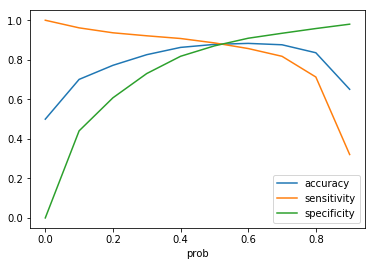

In [208]:
cutoff_df_lr.plot.line(x='prob', y=['accuracy', 'sensitivity', 'specificity'])

<font color='blue'> <b>Observation - </b><br>From above plot we can see that the best optimal probability cut-off is at approx. 0.5, which is also the cut-off value we have selected for our model.

### Let's now evaluate our Logistic Regression model on test data-set.

In [209]:
X_test_sm6 = sm.add_constant(X_test_scaled[selected_cols])

y_test_pred_lr6 = result.predict(X_test_sm6)

y_test_pred_lr6.head()

0    0.087881
1    0.693129
2    0.856913
3    0.951524
4    0.930056
dtype: float64

In [210]:
y_test_pred_final_lr = pd.DataFrame(columns=['Churn','Churn_prob'])

y_test_pred_final_lr['Churn'] = y_test_lr

y_test_pred_final_lr['Churn_prob'] = y_test_pred_lr6.values.reshape(-1)

y_test_pred_final_lr['Churn_pred'] = y_test_pred_final_lr['Churn_prob'].map(lambda x:1 if x > 0.5 else 0)

y_test_pred_final_lr.head()

,Churn,Churn_prob,Churn_pred
0,0,0.087881,0
1,1,0.693129,1
2,1,0.856913,1
3,1,0.951524,1
4,1,0.930056,1


In [211]:
#Model evaluation statistics for test data-set
Model_metrics(y_test_pred_final_lr['Churn'] ,y_test_pred_final_lr['Churn_pred'])

Model Evaluation measures: 

Confusion Matrix :
 [[7212 1042]
 [ 923 7359]]
Accuracy    :  88.12
Sensitivity :  88.86
Specificity :  87.38
AUC Score   :  88.12
Precision   :  87.6
f1 Score    :  88.22


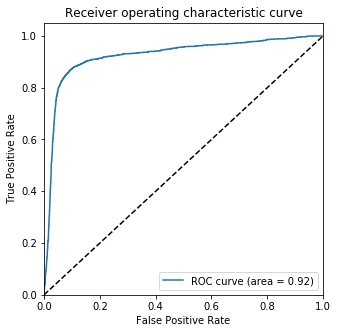

In [212]:
y_test_pred_lr6_prob = result.predict(X_test_sm6)

y_test_pred_lr6_prob[:5]

draw_roc(y_test, y_test_pred_lr6_prob)

<font color='blue'> <b>Observation - </b><br>So our model performance is consistent on training and test data-set.<br>

The important predictors from our Logistic Regression models are below -<br><br>
<table align="left">
 <th align="left"><b><font size = 3>Driver variables</font><b></th>

 <tr>
    <td align="left">arpu_6</td>
 </tr>
 <tr>
    <td align="left">arpu_7</td>
 </tr>
 <tr>
    <td align="left">roam_og_mou_8</td>
 </tr>
 <tr>
    <td align="left">loc_og_t2t_mou_7</td>
 </tr>
 <tr>
    <td align="left">std_og_t2t_mou_8</td>
 </tr>
 <tr>
    <td align="left">std_og_t2m_mou_8</td>
 </tr>
 <tr>
    <td align="left">loc_ic_t2t_mou_8</td>
 </tr>
 <tr>
    <td align="left">loc_ic_t2m_mou_7</td>
 </tr>
 <tr>
    <td align="left">loc_ic_t2m_mou_8</td>
 </tr>
 <tr>
    <td align="left">total_rech_amt_8</td>
 </tr>
 <tr>
    <td align="left">max_rech_data_8</td>
 </tr>
 <tr>
    <td align="left">monthly_2g_8</td>
 </tr>
 <tr>
    <td align="left">last_recharge_day_data_8</td>
 </tr>
</table>

<font color='blue'> <b>Conclusion - </b><br>We can see that a lot of attributes from the action month help us identify if the Customer will churn or not.<br><br>
If the customer incoming and outgoing calls reduces then there is a high chance that the customer will churn.<br><br>
Also if the "Total recharge amount" for voice calls and Internet data decreases or the "last day for Internet data recharge" is in the early days of action month it is a high indicator that the customer might churn.<br><br>
Also if the Customer has done more outgoing calls during roaming it is an indicator of Churn.

### Model 2 - Decision tree

Let's also now use a decision tree algorithm to find the important predictors.

In [213]:
from sklearn.tree import DecisionTreeClassifier

In [214]:
# Keeping max depth to 4, so that it is easy to interpret the final model.
model_dt_1 = DecisionTreeClassifier(max_depth=4)

model_dt_1.fit(X_train_scaled,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [215]:
y_test_pred_dt_default_1 = model_dt_1.predict(X_test_scaled)

y_test_pred_dt_default_1[:5]

array([0, 1, 1, 1, 1])

In [216]:
#Model evaluation statistics for test data-set
Model_metrics(y_test ,y_test_pred_dt_default_1)

Model Evaluation measures: 

Confusion Matrix :
 [[8135  119]
 [1003 7279]]
Accuracy    :  93.21
Sensitivity :  87.89
Specificity :  98.56
AUC Score   :  93.22
Precision   :  98.39
f1 Score    :  92.84


<font color='blue'> <b>Observation - </b><br>We have a good scores for "Accuracy", "Sensitivity" and "Specificity", so let's go ahead and check what predictors were used in the model.

### Let's now plot the Decision tree to identify the important predictors

In [217]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(X_train_scaled.columns)
features[:10]

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6']

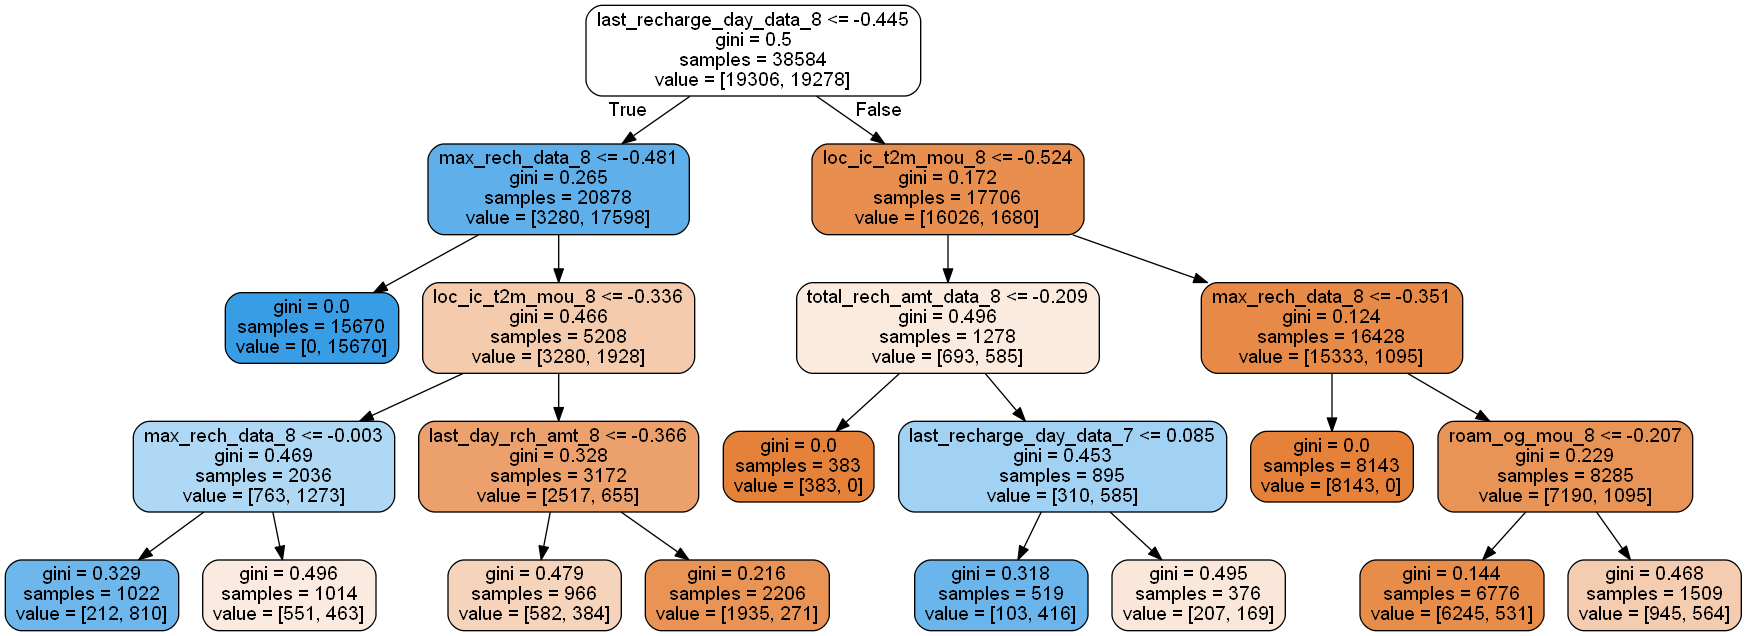

In [218]:
# plotting tree with max_depth=4
dot_data = StringIO()  

export_graphviz(model_dt_1, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())

<font color='blue'> <b>Conclusion - </b><br>Similar to Logistic Regression model, even for Decision Tree classifier we can see that a lot of attributes from the action month help us identify if the Customer will churn or not.<br><br>
If the last recharge day for Internet data is in the early days of action month it is a high indicator that the customer might churn.<br><br>
Also if "Max recharge amount" or "Total recharge amount" for Internet data decreases and local incoming calls from other mobile operater reduces in the action month then it is a indicator that the Customer might churn.<br><br>
Also if the Customer has done more outgoing calls during roaming it is an indicator of Churn.

### <font color='blue'>Recommendations -
<font color='blue'>
1] Offering discounts or lower tarrifs on outgoing calls.<br>
2] Offering multiple attractive Internet data recharge packs.<br>
3] Offering multiple attractive Voice recharge packs for Incoming and Outgoing calls for Local/ STD calls.<br>
4] Improving Internet Coverage/Connectivity and Speed.<br>
5] If no Internet recharge is done in the action month, offering customised offers to such Customers.<br>
6] Offer special discounts to Loyal Customers and New Customers to retain them.